# < Proejct 2. Dacon_Jeju : Visualization >

# 1. Problem Definition & Domain Research
## 1.1 Problem Definiton
### 1.1.1 Topic
- 공간 정보를 활용한 탐색적 데이터 분석 경진대회
### 1.1.2 Background
- 공간 정보를 활용하여 올 5~8월까지의 제주 지역 데이터를 분석하여 다양한 인사이트 발굴
### 1.1.3 Purpose
- 공간 정보를 활용한 탐색적 데이터 분석 및 시각화
- 공간 정보에 대한  일반인의 관심을 제고할 수 있는 인사이트 발굴  
### 1.1.4 Host  
- 국토연구원, Dacon

## 1.2 Data
### 1.2.1 Dictionary

- YM : 기준년월  
- SIDO : 지역대분류명  
- SIGUNGU : 지역중분류명  
- FranClass : 소상공인구분  
  - 영세 : 연매출 3억 이하
  - 중소 : 5억 이하
  - 중소1	: 10억이하
  - 중소2	: 30억이하
  - 일반(대형) : 30억초과 
- Type : 업종명  
- Time : 시간대  
  - 새벽 : 2~6	
  - 오전 : 6~11	
  - 점심 : 11~15	
  - 오후 : 15~18	
  - 저녁 : 18~22	
  - 심야 : 22~02	
  - x : 무승인거래 (별도 승인없이 결제되는 건(SMS자동결제, 기내 면세점 등))
- TotalSpent : 총사용금액 (재난지원금 사용금액 포함)
- DisSpent : 재난지원금 사용금액  
  - negative value : refund
- NumOfSpent : 총 이용건수  
- NumOfDisSpent : 총 재난지원금 이용건수  
- POINT_X, POINT_Y : X,Y 좌표  

## 1.3 Domain Research
- What is Disspent?
  - Why
    - 코로나19 위기 극복을 위한 정부의 한시적인 지원제도 
    - 국민생활 안정과 경제회복 지원을 목적으로 함
  - When & what
    - first : from 20/04/20 to 20/05, cash 550억원
    - second : from 20/08/24 to 20/10/11, cash 698억원
  - where
    - offline only
    - not allowed : 대형마트, 백화점, 유흥업종, 위생업종, 골프장/노래방 등 레저업종, 카지노/복권방 등 사행업종, 성인용품점, 귀금속, 면세, 보험, 교통/통신료 등 자동이체 건
- Questions
  - 재난지원금 사용처 제한으로 인한 소비의 이동
    - 골프장/노래방 등 레저업종 혹은 대형마트 혹은 백화점 혹은 유흥업종 혹은 면세에 사비를 쓰고, 꾸준히 비용발생하던 타 업종에 재난지원금 사용가능  
      How? 전체 사용금액 변화체크, 사용제한 업종별 사용금액 변화체크, 사용가능 업종별 사용금액 변화체크
  - 국민의 소비가 재난지원금 지원 이전과 비교하여 높아졌는가?
    - 100만원 쓰던 사람이 130만원 썼는지? => 국민소비 증가 / 자영업자 매출증가
      How? 전체 사용금액 변화체크
    - 100만원 쓰던 사람이 사비 70, 재난지원금 30쓰고 남은 돈은 저축했는지? => 국민소비 답보 / 자영업자 매출증가 혹은 답보
      How? 전체 사용금액 변화체크, 재난지원금 사용금액 체크
  - 기간별 변화
  - 시간별 변화
  - 업종별 변화
  - 업종규모별
  - 지역별 변화
  - 각 컬럼의 상관관계 체크 -> 이를 활용한 시각화

# 2. Acquire training and testig data : Data Loading¶
## 2.1 Package Loading & Basic Setting

In [70]:
import os
import warnings
warnings.filterwarnings('ignore')

In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [73]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

## 2.2 Data Loading

In [74]:
os.chdir("/Users/harryjeong/DA/Project/dacon_jeju")

In [12]:
import glob

path = "./data/*.txt"
flist = glob.glob(path)
flist = sorted(flist)
flist

['./data/KRI-DAC_Jeju_data5.txt',
 './data/KRI-DAC_Jeju_data6.txt',
 './data/KRI-DAC_Jeju_data7.txt',
 './data/KRI-DAC_Jeju_data8.txt']

In [8]:
# May
mon5 = pd.read_csv(flist[0])
mon5.columns = mon5.columns.str.lower()
mon5.shape

(273183, 14)

In [9]:
# June
mon6 = pd.read_csv(flist[1])
mon6.columns = mon6.columns.str.lower()
mon6.shape

(281896, 14)

In [10]:
# July
mon7 = pd.read_csv(flist[2])
mon7.columns = mon7.columns.str.lower()
mon7.shape

(284265, 16)

In [11]:
# August
mon8 = pd.read_csv(flist[3])
mon8.columns = mon8.columns.str.lower()
mon8.shape

(280085, 14)

In [12]:
mon8.head()

,objectid,field1,ym,sido,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y
0,1,1,202008,제주특별자치도,제주시,영세,일반한식,00시,249500,0,7,0,877005.9834,1.479766e+06
1,2,2,202008,제주특별자치도,제주시,영세,단란주점,00시,2010000,0,7,0,877005.7447,1.479816e+06
2,3,3,202008,제주특별자치도,제주시,중소1,편의점,00시,401210,0,41,0,877056.6756,1.479616e+06
3,4,4,202008,제주특별자치도,제주시,영세,편의점,00시,12250,0,1,0,877055.9593,1.479766e+06
4,5,5,202008,제주특별자치도,제주시,영세,주점,00시,33000,0,1,0,877055.4817,1.479866e+06


# 3. Data Analyze (EDA) & Preprocessing (Wrangle, Cleanse)
## 3.1 Analyze by describing data (Quick-view)¶

### Merging for checking all at once

In [13]:
spent = ['totalspent','disspent','numofspent','numofdisspent']
keyvar = ['type','time','point_x','point_y']
idvar = ['objectid','field1','sigungu','franclass']

In [14]:
# mon7 내 불필요한 컬럼 x, y 제거
mon7.columns.values

array(['objectid', 'field1', 'ym', 'sido', 'sigungu', 'x', 'y',
       'franclass', 'type', 'time', 'totalspent', 'disspent',
       'numofspent', 'numofdisspent', 'point_x', 'point_y'], dtype=object)

In [15]:
mon7 = mon7.drop(['x', 'y'], axis = 1)

In [16]:
import pandas as pd
df_all = mon5.append(mon6, ignore_index = True).append(mon7, ignore_index = True).append(mon8, ignore_index = True)

In [17]:
df_all.shape

(1119429, 14)

### 3.1.1 Check columns (name)

In [18]:
df_all.columns.values

array(['objectid', 'field1', 'ym', 'sido', 'sigungu', 'franclass', 'type',
       'time', 'totalspent', 'disspent', 'numofspent', 'numofdisspent',
       'point_x', 'point_y'], dtype=object)

### 3.1.2 Check feature type

In [19]:
df_all.head()

,objectid,field1,ym,sido,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06
1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06
3,4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06
4,5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06


### 3.1.3 Check errors or typos
- nothing

In [20]:
# strings
display(df_all['sigungu'].unique(),
        df_all['franclass'].unique(),
        df_all['type'].unique(),
        df_all['time'].unique())

array(['제주시', '서귀포시'], dtype=object)

array(['영세', '중소1', '중소', '중소2', '일반'], dtype=object)

array(['일반한식', '단란주점', '편의점', '주점', '스넥', '서양음식', '일식회집', '기타음료식품', '노래방',
       '중국음식', '슈퍼마켓', '유흥주점', '기타숙박업', '기타레져업', '당구장', '농축수산품', '유아원',
       '골프경기장', '세탁소', '가방', '콘도', '주차장', '문화취미기타', '주유소', '사무서비스',
       '자동차정비', '특급호텔', '볼링장', '화장품', '기타회원제형태업소', '주류판매점', '제과점',
       '피부미용실', '약국', '칵테일바', '정육점', '독서실', '스포츠레져용품', '골프용품', 'LPG',
       '종합병원', '사우나', '화원', '의원', '안마스포츠마사지', '골프연습장', '2급호텔', '기타대인서비스',
       '보습학원', '부동산분양', '화물운송', '애완동물', '동물병원', '대형할인점', '인터넷Mall', '항공사',
       '헬스크럽', '기타유통업', '레져용품수리', '정장', '레져업소(회원제형태)', '관광여행', '1급호텔',
       '침구수예점', '사진관', '악세사리', '보관창고업', '기념품점', '미용원', '영화관', '의료용품',
       '세차장', '인터넷종합Mall', '기타잡화', '성인용품점', '상품권', '종합용역', '기계공구',
       '조세서비스', '택시', '기타의료기관및기기', '가례서비스', '구내매점', '수영장', '목재석재철물',
       '건축요업품', '기타업종', '렌트카', '종합레져타운', '유류판매', '농축협직영매장', '기타건축자재',
       '비료농약사료종자', '농기계', '보일러펌프', '가전제품', '스포츠의류', '페인트', '미곡상',
       '기타농업관련', '기타가구', '공공요금', '기능학원', '면세점', '기타교육', '위탁급식업', '이용원',
       '조명기구',

array(['00시', '01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시',
       '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시',
       '18시', '19시', '20시', '21시', '22시', '23시', 'x시'], dtype=object)

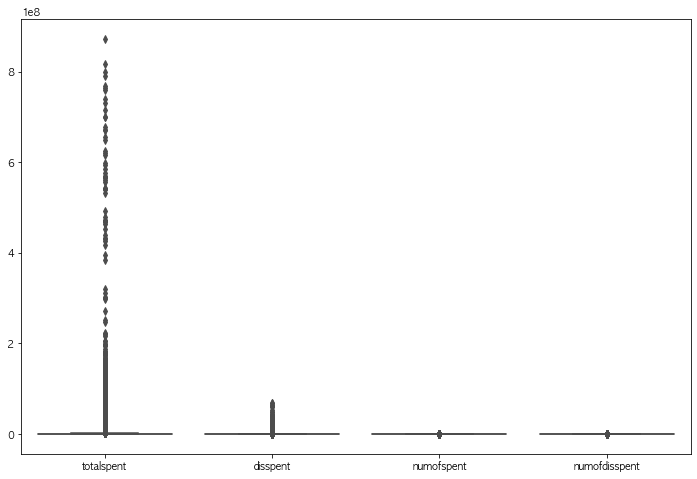

In [21]:
# numbers
plt.figure(figsize = (12, 8))
sns.boxplot(data = df_all[spent], color = 'red')
plt.show()

### 3.1.4 Check blank, null or empty values & data types
- nothing

In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119429 entries, 0 to 1119428
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   objectid       1119429 non-null  int64  
 1   field1         1119429 non-null  int64  
 2   ym             1119429 non-null  int64  
 3   sido           1119429 non-null  object 
 4   sigungu        1119429 non-null  object 
 5   franclass      1119429 non-null  object 
 6   type           1119429 non-null  object 
 7   time           1119429 non-null  object 
 8   totalspent     1119429 non-null  int64  
 9   disspent       1119429 non-null  int64  
 10  numofspent     1119429 non-null  int64  
 11  numofdisspent  1119429 non-null  int64  
 12  point_x        1119429 non-null  float64
 13  point_y        1119429 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 119.6+ MB


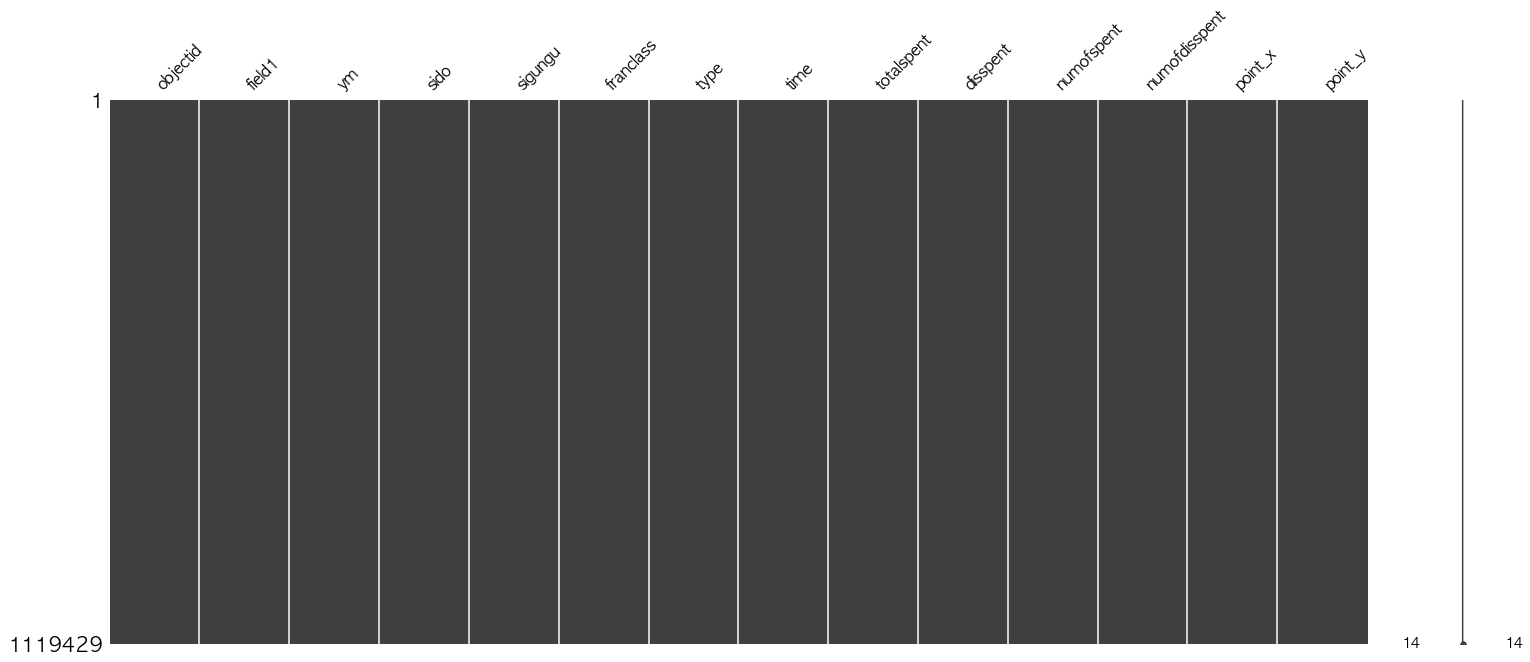

In [23]:
import missingno
missingno.matrix(df_all);

### 3.1.5 Check distribution of numerical feature values

In [24]:
df_all.describe().astype(int)

,objectid,field1,ym,totalspent,disspent,numofspent,numofdisspent,point_x,point_y
count,1119429,1119429,1119429,1119429,1119429,1119429,1119429,1119429,1119429
mean,139959,139959,202006,625699,31921,19,1,909222,1493554
std,80840,80840,1,4965843,312557,80,6,13210,11947
min,1,1,202005,1,-650000,1,-1,875603,1458813
25%,69965,69965,202006,61000,0,2,0,905002,1481855
50%,139929,139929,202007,185300,0,5,0,909384,1499717
75%,209893,209893,202008,480360,4500,18,1,912720,1501363
max,284265,284265,202008,872468620,68372220,10359,1025,950724,1552940


In [25]:
# There are two shops with 1 won of totalspent.
df_all[df_all.totalspent == df_all.min().totalspent]

,objectid,field1,ym,sido,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y
170893,170894,170894,202005,제주특별자치도,서귀포시,영세,기타건축자재,17시,1,0,1,0,877116.4385,1.477568e+06
840976,1633,1633,202008,제주특별자치도,제주시,영세,유흥주점,00시,1,0,1,0,906195.3843,1.500147e+06


In [26]:
# 872,468,620 won is the max totalspent. (면세점)
df_all[df_all.totalspent == df_all.max().totalspent]

,objectid,field1,ym,sido,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y
998394,159051,159051,202008,제주특별자치도,제주시,일반,면세점,16시,872468620,0,10359,0,906435.4321,1.502197e+06


## 3.2 Assupmtion in 5-fundamental ways<a name="assumption"></a>
>We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### 3.2.1 Correlating
Correlating. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.
- nothing in this project

### 3.2.2 Completing
Completing. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.
- ex) there is no missing values

### 3.2.3 Correcting
Correcting. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.
- Let's drop 'sido'

spent = ['totalspent','disspent','numofspent','numofdisspent']  
keyvar = ['type','time','point_x','point_y']  
idvar = ['objectid','field1','sigungu','franclass']

In [27]:
df_all = df_all.drop('sido', axis = 1)

### 3.2.4 Creating
Creating. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.
- We may create a feature called 'singlespent' by totalspent/numofspent.
- We may create a feature called 'singledis' by disspent/numofdisspent.
- We may create a feature called 'address' by using new data set. (http://data.nsdi.go.kr/dataset/15145)
- We may create a feature called 'category' by categorizing type feature.
- We may create a feature called 'time' by categorizing type feature.

### Address

In [28]:
import plotly
plotly.__version__

'4.14.1'

In [29]:
from tqdm import tqdm
from shapely.geometry import shape, Point
import pandas as pd
import folium
import json
import requests

from collections import defaultdict

In [30]:
# 1) 좌표 변환하기
df_addr = df_all.copy()

In [31]:
from pyproj import transform, Proj
# ITRF좌표계
proj_ITRF = Proj(init='epsg:5179')
# WGS 좌표계 
proj_WGS84 = Proj(init='epsg:4326')

In [32]:
# 좌표 원형 세팅
df_addr['lon'], df_addr['lat'] = transform(proj_ITRF, proj_WGS84, df_addr['point_x'], df_addr['point_y'])

In [33]:
df_addr.lon

0          126.178894
1          126.178884
2          126.179458
3          126.179430
4          126.179412
              ...    
1119424    126.964496
1119425    126.965056
1119426    126.966708
1119427    126.967907
1119428    126.967704
Name: lon, Length: 1119429, dtype: float64

In [34]:
# 2) 좌표 구분 컬럼 생성
df_addr['lon'] = df_addr['lon'].astype(str)
df_addr['lat'] = df_addr['lat'].astype(str)
df_addr['lon_lat'] = df_addr['lon']+'_'+df_addr['lat']
df_addr['lon_lat'].value_counts()

126.52427851055405_33.51290574138535     1559
126.52935695016222_33.49899169591379     1242
126.52880376641139_33.499886709171996    1208
126.47793511858133_33.48574932701181     1193
126.58018359519565_33.516714007010115    1051
                                         ... 
126.83044568201062_33.3556817369183         1
126.25335904241578_33.229005119286064       1
126.53775974073888_33.511262307561964       1
126.53061084989626_33.26459309298283        1
126.54476610471036_33.47843716970768        1
Name: lon_lat, Length: 15369, dtype: int64

In [35]:
# 3) 중복 좌표 삭제 > url 생성
df_uniq = df_addr.drop_duplicates('lon_lat')
df_uniq.value_counts('lon_lat')

lon_lat
126.96951006044938_33.49847009919258    1
126.47811623086326_33.47538351559905    1
126.48442861417139_33.48357491660469    1
126.48442077192473_33.48402560524201    1
126.48441292953432_33.484476293845      1
                                       ..
126.55905347348659_33.26447484368766    1
126.55904890855706_33.49302917262809    1
126.55904607948446_33.26492556370237    1
126.55904144958775_33.49347987578169    1
126.16370558240443_33.33544861735468    1
Length: 15369, dtype: int64

In [36]:
# url 생성
df_uniq['url1'] = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x=' + df_uniq['lon']
df_uniq['url2'] = '&y=' + df_uniq['lat']
df_uniq['url'] = df_uniq['url1'] + df_uniq['url2']

In [37]:
df_uniq.drop(columns=['url1','url2'],axis=1,inplace=True)
df_uniq = df_uniq.reset_index()
df_uniq.head(5)

,index,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y,lon,lat,lon_lat,url
0,0,1,1,202005,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,https://dapi.kakao.com/v2/local/geo/coord2regi...
1,1,2,2,202005,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875,https://dapi.kakao.com/v2/local/geo/coord2regi...
2,2,3,3,202005,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06,126.17945834265305,33.30097125427593,126.17945834265305_33.30097125427593,https://dapi.kakao.com/v2/local/geo/coord2regi...
3,3,4,4,202005,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06,126.17943027296923,33.30232314934195,126.17943027296923_33.30232314934195,https://dapi.kakao.com/v2/local/geo/coord2regi...
4,4,5,5,202005,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06,126.17941155823847,33.303224412837565,126.17941155823847_33.303224412837565,https://dapi.kakao.com/v2/local/geo/coord2regi...


In [38]:
# 4) API를 통해 주소 가져오기 
import requests
import json
dong_ls = []

for i in range(len(df_uniq.index)):
    url = df_uniq['url'][i]
    headers = {"Authorization" : "KakaoAK 435931134ac297750563ec9dbe3a0ed0"}
    api_test = requests.get(url, headers=headers)
    url_text = json.loads(api_test.text)
    dong = url_text['documents'][0]['region_3depth_name']
    dong_ls.append(dong)
print('converted point to addr')

converted point to addr


In [39]:
# 가져온 주소값 df 변환 
dic = {'dong':dong_ls}
df_dong = pd.DataFrame(dic)
df_dong.tail(3)

,dong
15366,도평동
15367,오등동
15368,이도이동


In [40]:
# 5) df와 merge 
df_join = df_uniq.join(df_dong)
df_join

,index,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y,lon,lat,lon_lat,url,dong
0,0,1,1,202005,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
1,1,2,2,202005,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
2,2,3,3,202005,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06,126.17945834265305,33.30097125427593,126.17945834265305_33.30097125427593,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
3,3,4,4,202005,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06,126.17943027296923,33.30232314934195,126.17943027296923_33.30232314934195,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
4,4,5,5,202005,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06,126.17941155823847,33.303224412837565,126.17941155823847_33.303224412837565,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,1108336,268993,268993,202008,서귀포시,영세,기타숙박업,23시,400000,0,1,0,938495.6888,1.486907e+06,126.83882456997848,33.37198974202468,126.83882456997848_33.37198974202468,https://dapi.kakao.com/v2/local/geo/coord2regi...,성산읍
15365,1109370,270027,270027,202008,제주시,영세,기타교육,x시,240000,0,1,0,887877.0846,1.495211e+06,126.29371775568167,33.44278262819118,126.29371775568167_33.44278262819118,https://dapi.kakao.com/v2/local/geo/coord2regi...,한림읍
15366,1110636,271293,271293,202008,제주시,영세,기타교육,x시,300000,0,1,0,902149.8531,1.499578e+06,126.44677192780091,33.483559882610706,126.44677192780091_33.483559882610706,https://dapi.kakao.com/v2/local/geo/coord2regi...,도평동
15367,1114504,275161,275161,202008,제주시,영세,농축수산품,x시,300000,0,1,0,909802.1699,1.498415e+06,126.5292452740336,33.473746251556754,126.5292452740336_33.473746251556754,https://dapi.kakao.com/v2/local/geo/coord2regi...,오등동


In [41]:
# 변환된 주소값을 원본 데이터와 합치기 
addrlist = df_join[['lon_lat','dong']]
addrlist.tail(3)

,lon_lat,dong
15366,126.44677192780091_33.483559882610706,도평동
15367,126.5292452740336_33.473746251556754,오등동
15368,126.535342658025_33.4950054416331,이도이동


In [42]:
addrlist

,lon_lat,dong
0,126.17889362710162_33.30231529076243,한경면
1,126.17888426813494_33.302765922881875,한경면
2,126.17945834265305_33.30097125427593,한경면
3,126.17943027296923_33.30232314934195,한경면
4,126.17941155823847_33.303224412837565,한경면
...,...,...
15364,126.83882456997848_33.37198974202468,성산읍
15365,126.29371775568167_33.44278262819118,한림읍
15366,126.44677192780091_33.483559882610706,도평동
15367,126.5292452740336_33.473746251556754,오등동


In [43]:
df_addr

,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y,lon,lat,lon_lat
0,1,1,202005,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
1,2,2,202005,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875
2,3,3,202005,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06,126.17945834265305,33.30097125427593,126.17945834265305_33.30097125427593
3,4,4,202005,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06,126.17943027296923,33.30232314934195,126.17943027296923_33.30232314934195
4,5,5,202005,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06,126.17941155823847,33.303224412837565,126.17941155823847_33.303224412837565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119424,280081,280081,202008,제주시,영세,편의점,x시,13700,0,2,0,950266.5976,1.502458e+06,126.96449620673,33.51285447500651,126.96449620673_33.51285447500651
1119425,280082,280082,202008,제주시,영세,일반한식,x시,56000,0,1,0,950317.5379,1.502258e+06,126.96505576792752,33.511055881956054,126.96505576792752_33.511055881956054
1119426,280083,280083,202008,제주시,영세,일반한식,x시,28000,0,1,0,950469.1585,1.501909e+06,126.96670756246148,33.50791393813245,126.96670756246148_33.50791393813245
1119427,280084,280084,202008,제주시,중소1,중국음식,x시,46000,0,3,0,950574.6388,1.500760e+06,126.96790663143533,33.49755514050082,126.96790663143533_33.49755514050082


In [102]:
df_full = pd.merge(df_addr, addrlist, how = 'inner', on = 'lon_lat')
df_full.head()

,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y,lon,lat,lon_lat,dong
0,1,1,202005,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
1,4904,4904,202005,제주시,영세,일반한식,01시,86500,0,3,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
2,8569,8569,202005,제주시,영세,일반한식,02시,208000,0,5,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
3,11270,11270,202005,제주시,영세,일반한식,03시,18000,0,1,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
4,19122,19122,202005,제주시,중소,한의원,07시,4800,0,2,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면


In [75]:
# import pickle
# with open('jeju_all.pickle', 'wb') as fw:
#      pickle.dump(df_full, fw)

In [76]:
import pickle
with open('jeju_all.pickle','rb') as fr:
    jeju_all = pickle.load(fr)

jeju_all.tail(3)

,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y,lon,lat,lon_lat,dong
1119426,271293,271293,202008,제주시,영세,기타교육,x시,300000,0,1,0,902149.8531,1.499578e+06,126.44677192780091,33.483559882610706,126.44677192780091_33.483559882610706,도평동
1119427,275161,275161,202008,제주시,영세,농축수산품,x시,300000,0,1,0,909802.1699,1.498415e+06,126.5292452740336,33.473746251556754,126.5292452740336_33.473746251556754,오등동
1119428,275664,275664,202008,제주시,영세,학원(회원제형태),x시,220000,0,1,0,910390.6274,1.500767e+06,126.535342658025,33.4950054416331,126.535342658025_33.4950054416331,이도이동


### Category

In [77]:
# creating categories
df_cat = jeju_all.type.copy()

df_cat.replace(dict.fromkeys(['택시', '기타교통수단', '통신기기'], '교통/통신'), inplace=True)
df_cat.replace(dict.fromkeys(['대형할인점', '농축협직영매장', '농협하나로클럽', '편의점', '슈퍼마켓', '정육점', '기타유통업', '연쇄점', '상품권', '인삼제품', '홍삼제품', '농축수산품', '주류판매점', '기타건강식', '건강식품(회원제형태)'], '마트/편의점(유통)'), inplace=True)
df_cat.replace(dict.fromkeys(['악기점', 'DVD음반테이프판매', '문화취미기타', '영화관', '티켓', '수족관', '화랑'], '영화/문화'), inplace=True)
df_cat.replace(dict.fromkeys(['내의판매점', '양품점', '옷감직물', '귀금속', '기타직물', '스포츠의류', '가방', '정장', '악세사리', '기타잡화', '신발', '기타의류', '단체복', '아동의류', '캐쥬얼의류', '맞춤복점', '제화점', '인터넷Mall', '인터넷종합Mall'], '쇼핑/패션'), inplace=True)
df_cat.replace(dict.fromkeys(['제과점', '스넥', '기타음료식품'], '카페/베이커리'), inplace=True)
df_cat.replace(dict.fromkeys(['미용재료', '화장품', '피부미용실', '미용원', '이용원'], '뷰티'), inplace=True)
df_cat.replace(dict.fromkeys(['구내매점', '단란주점', '주점', '서양음식', '일반한식', '일식회집', '중국음식',  '유흥주점', '칵테일바'], '외식/주점'), inplace=True)
df_cat.replace(dict.fromkeys(['세탁소', '애완동물', '화원', '침구수예점', '성인용품점', '가전제품', '기타가구', '조명기구', '민예공예품', '주방용식기', '기타전기제품', '소프트웨어', '주방용구', '카페트커텐천막', '컴퓨터', '카메라', '일반가구', '정수기', '철제가구', '시계', '안경', '사우나', '안마스포츠마사지', '사진관', '인테리어', 'CATV'], '생활/기타'), inplace=True)
df_cat.replace(dict.fromkeys(['완구점', '화방표구점', '문구용품', '일반서적', '출판인쇄물', '기타사무용', '사무기기', '전문서적', '정기간행물', '기타서적문구', '서적출판(회원제형태)'], '서점/문구'), inplace=True)
df_cat.replace(dict.fromkeys(['기타보험', '손해보험'], '금융'), inplace=True)
df_cat.replace(dict.fromkeys(['기념품점', '기타숙박업', '특급호텔', '2급호텔', '1급호텔', '콘도', '렌트카', '관광여행', '항공사', '여객선', '면세점'], '여행/숙박'), inplace=True)
df_cat.replace(dict.fromkeys(['레져용품수리', '스포츠레져용품', '골프용품', '노래방', '당구장', '골프경기장', '볼링장', '골프연습장', '헬스크럽', '레져업소(회원제형태)', '기타레져업', '종합레져타운', '수영장', '테니스장', '기타회원제형태업소', ], '레저/스포츠'), inplace=True)
df_cat.replace(dict.fromkeys(['유아원', '독서실', '보습학원', '기능학원', '기타교육', '외국어학원', '학원(회원제형태)', '예체능학원', '컴퓨터학원', '대학등록금', '학습지교육', '초중고교육기관'], '교육/육아'), inplace=True)
df_cat.replace(dict.fromkeys(['주유소', '자동차정비', 'LPG', '세차장', '유류판매', '이륜차판매', '윤활유전문판매', '자동차시트타이어', '중고자동차', '수입자동차', '자동차부품', '주차장', '기타자동차서비스', '카인테리어', ], '주유/자동차'), inplace=True)
df_cat.replace(dict.fromkeys(['약국', '종합병원', '기타의료기관및기기', '한약방', '제약회사', '의료용품', '건강진단', '한의원', '동물병원', '의원', '치과의원', '병원', '산후조리원', '치과병원'], '의료'), inplace=True)
df_cat.replace(dict.fromkeys(['목재석재철물', '건축요업품', '골동품점', '기계공구', '기타건축자재', '보일러펌프', '페인트', '냉열기기', '유리', '과학기자재', '기타광학품', '기타연료', '중장비수리', ], '건설/제조'), inplace=True)
df_cat.replace(dict.fromkeys(['기타농업관련', '비료농약사료종자', '농기계', '미곡상'], '농업'), inplace=True)
df_cat.replace(dict.fromkeys(['사무서비스', '기타대인서비스', '화물운송', '보관창고업', '종합용역', '조세서비스', '가례서비스', '공공요금', '위탁급식업', '기타용역서비스', '기타수리서비스', '기타운송', '가정용품수리', '견인서비스', '부동산중개임대', '부동산분양', '신변잡화수리', '사무통신기기수리', '법률회계서비스', '사무서비스(회원제형태)', '정보서비스', '기타업종', '기타비영리유통'], '서비스/기타'), inplace=True)

In [78]:
jeju_all['category'] = df_cat
jeju_all.category.unique()

array(['외식/주점', '의료', '마트/편의점(유통)', '농업', '카페/베이커리', '뷰티', '서점/문구',
       '여행/숙박', '레저/스포츠', '생활/기타', '건설/제조', '교육/육아', '쇼핑/패션', '서비스/기타',
       '교통/통신', '주유/자동차', '영화/문화', '금융'], dtype=object)

In [79]:
jeju_all.head()

,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y,lon,lat,lon_lat,dong,category
0,1,1,202005,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
1,4904,4904,202005,제주시,영세,일반한식,01시,86500,0,3,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
2,8569,8569,202005,제주시,영세,일반한식,02시,208000,0,5,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
3,11270,11270,202005,제주시,영세,일반한식,03시,18000,0,1,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
4,19122,19122,202005,제주시,중소,한의원,07시,4800,0,2,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,의료


### time_cut

In [80]:
# Time에 '시'를 제거해 줍니다.
jeju_all['time'] = jeju_all['time'].str.replace('시', '')

# 시간을 큰 범위로 변화해 줍니다.
def time_cut(x):
    if '06'> x >='02':
        return '새벽'
    elif '11'> x >= '06':
        return '오전'
    elif '15' > x >= '11':
        return '점심'
    elif '18' > x >= '15':
        return '오후'
    elif  '22'> x >= '18':
        return '저녁'
    else:
        return '심야'

In [81]:
# 함수적용
jeju_all['time_cut'] = jeju_all['time'].apply(time_cut)
jeju_all.loc[jeju_all['time']=='x', 'time_cut'] ='무승인거래'

jeju_all.head()

,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y,lon,lat,lon_lat,dong,category,time_cut
0,1,1,202005,제주시,영세,일반한식,00,363000,66500,10,2,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,심야
1,4904,4904,202005,제주시,영세,일반한식,01,86500,0,3,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,심야
2,8569,8569,202005,제주시,영세,일반한식,02,208000,0,5,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,새벽
3,11270,11270,202005,제주시,영세,일반한식,03,18000,0,1,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,새벽
4,19122,19122,202005,제주시,중소,한의원,07,4800,0,2,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,의료,오전


### tot-dis

In [82]:
jeju_all['tot_dis'] = jeju_all.totalspent - jeju_all.disspent

In [83]:
jeju_all['num_tot_dis'] = jeju_all.numofspent - jeju_all.numofdisspent

In [84]:
jeju_all.head()

,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,...,point_x,point_y,lon,lat,lon_lat,dong,category,time_cut,tot_dis,num_tot_dis
0,1,1,202005,제주시,영세,일반한식,00,363000,66500,10,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,심야,296500,8
1,4904,4904,202005,제주시,영세,일반한식,01,86500,0,3,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,심야,86500,3
2,8569,8569,202005,제주시,영세,일반한식,02,208000,0,5,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,새벽,208000,5
3,11270,11270,202005,제주시,영세,일반한식,03,18000,0,1,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,새벽,18000,1
4,19122,19122,202005,제주시,중소,한의원,07,4800,0,2,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,의료,오전,4800,2


### 3.2.5 Classifying
Classifying. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.
- nothing in this project

## 3.3 Analyze by pivoting features & Visualization<a name="pivoting"></a>

### 3.3.1 Macro (key vs spent)
spent = ['totalspent','disspent','numofspent','numofdisspent', 'tot_dis', 'num_tot_dis']  
key = ['sigungu', 'ym', 'type','time','franclass','dong','category']  
- all period
  - 'sigungu' vs spent
  - 'ym' vs spent
  - 'category' vs spent
  - 'type' vs spent
  - 'time' vs spent
  - 'franclass' vs spent
  - 'dong' vs spent
  - 'time_cut' vs spent

### Basic

In [85]:
spent = ['totalspent','disspent','numofspent','numofdisspent', 'tot_dis', 'num_tot_dis']  
total = jeju_all[spent].apply(sum, axis = 0)
total

totalspent       700426010461
disspent          35733656647
numofspent           21917930
numofdisspent         1242134
tot_dis          664692353814
num_tot_dis          20675796
dtype: int64

In [86]:
total[0] / total[2]

31956.75916754

In [87]:
total[1] / total[3]

28767.956313086994

In [88]:
jeju_all.head()

,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,...,point_x,point_y,lon,lat,lon_lat,dong,category,time_cut,tot_dis,num_tot_dis
0,1,1,202005,제주시,영세,일반한식,00,363000,66500,10,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,심야,296500,8
1,4904,4904,202005,제주시,영세,일반한식,01,86500,0,3,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,심야,86500,3
2,8569,8569,202005,제주시,영세,일반한식,02,208000,0,5,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,새벽,208000,5
3,11270,11270,202005,제주시,영세,일반한식,03,18000,0,1,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,새벽,18000,1
4,19122,19122,202005,제주시,중소,한의원,07,4800,0,2,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,의료,오전,4800,2


### totalspent

<AxesSubplot:xlabel='time_cut', ylabel='totalspent'>

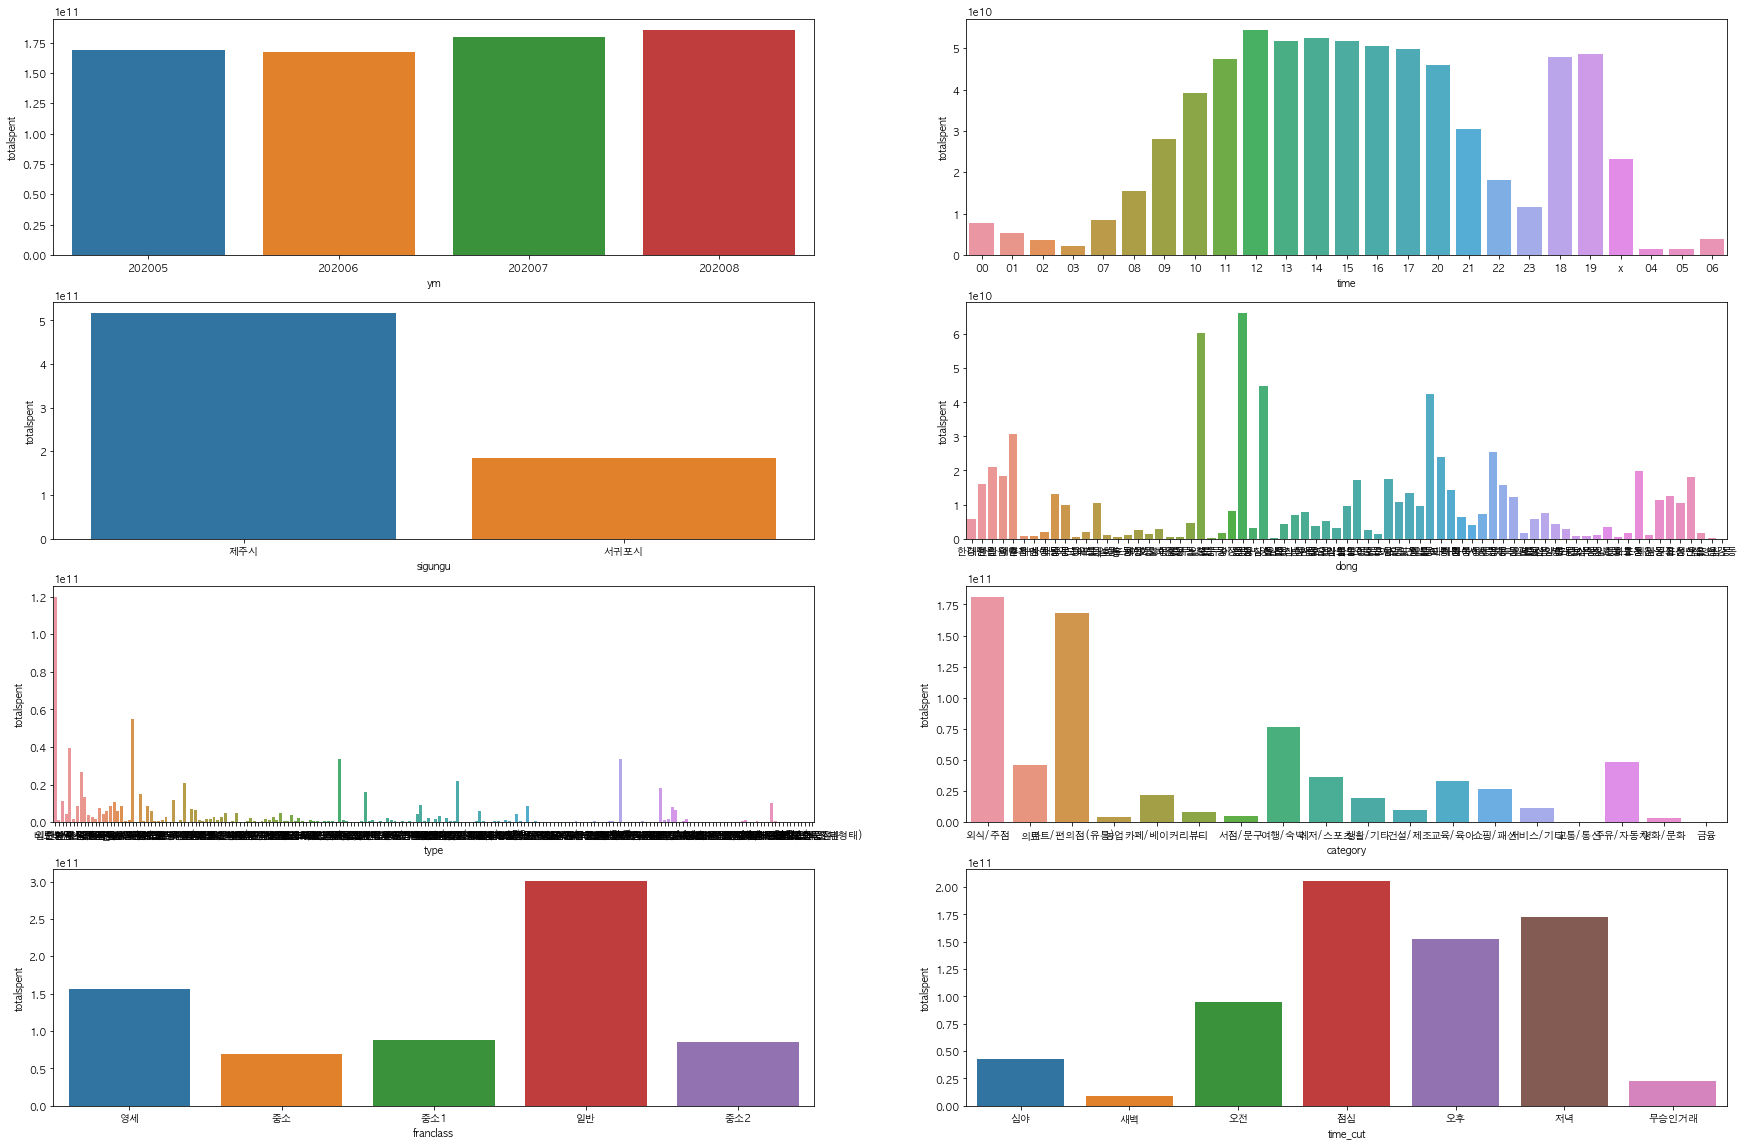

In [89]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns 
figure, ((ax1,ax2), (ax3,ax4),(ax5,ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(30, 20)

sns.barplot(data=jeju_all, x="ym", y="totalspent", ax=ax1, ci = None, estimator = sum)  # 월별 총사용금액 
sns.barplot(data=jeju_all, x="time", y="totalspent", ax=ax2, ci = None, estimator = sum)  # 시간대별 총 사용금액 
sns.barplot(data=jeju_all, x="sigungu", y="totalspent", ax=ax3, ci = None, estimator = sum) # 제주/서귀포 총 사용금액
sns.barplot(data=jeju_all, x="dong", y="totalspent", ax=ax4, ci = None, estimator = sum) # 읍면동별 총 사용금액 
sns.barplot(data=jeju_all, x="type", y="totalspent", ax=ax5, ci = None, estimator = sum) # 업종별 총 사용금액 
sns.barplot(data=jeju_all, x="category", y="totalspent", ax=ax6, ci = None, estimator = sum) # 업종구분별 총 사용금액 
sns.barplot(data=jeju_all, x="franclass", y="totalspent", ax=ax7, ci = None, estimator = sum) # 업체규모별 총 사용금액 
sns.barplot(data=jeju_all, x="time_cut", y="totalspent", ax=ax8, ci = None, estimator = sum) # 시간구분별 총 사용금액 

In [90]:
jeju_all.groupby(['ym'])['totalspent'].sum().sort_values(ascending = False)/sum(jeju_all.totalspent)*100

ym
202008    26.479058
202007    25.597791
202005    24.083588
202006    23.839563
Name: totalspent, dtype: float64

In [91]:
ratecal = jeju_all.groupby(['dong'])['totalspent'].sum().sort_values(ascending = False)/sum(jeju_all.totalspent)*100
ratecal[:10]

dong
연동      9.441773
노형동     8.609913
용담이동    6.413334
이도이동    6.055309
애월읍     4.366815
서귀동     3.631822
일도이동    3.427905
한림읍     3.013813
조천읍     2.815341
안덕면     2.610368
Name: totalspent, dtype: float64

In [92]:
jeju_all.groupby(['sigungu'])['totalspent'].sum().sort_values(ascending = False)/sum(jeju_all.totalspent)*100

sigungu
제주시     73.662077
서귀포시    26.337923
Name: totalspent, dtype: float64

In [93]:
jeju_all.groupby(['category'])['totalspent'].sum().sort_values(ascending = False)/sum(jeju_all.totalspent)*100

category
외식/주점         25.832309
마트/편의점(유통)    24.045997
여행/숙박         10.888838
주유/자동차         6.927269
의료             6.539776
레저/스포츠         5.239519
교육/육아          4.780630
쇼핑/패션          3.831281
카페/베이커리        3.123297
생활/기타          2.776294
서비스/기타         1.624319
건설/제조          1.368791
뷰티             1.200389
서점/문구          0.670695
농업             0.604158
영화/문화          0.509064
교통/통신          0.028373
금융             0.009001
Name: totalspent, dtype: float64

In [94]:
ratecal = jeju_all.groupby(['type'])['totalspent'].sum().sort_values(ascending = False)/sum(jeju_all.totalspent)*100
ratecal[:10]

type
일반한식       17.101386
슈퍼마켓        7.807250
편의점         5.636274
면세점         4.833357
주유소         4.804311
서양음식        3.833656
농축협직영매장     3.108918
유아원         2.993809
대형할인점       2.596661
골프경기장       2.262275
Name: totalspent, dtype: float64

In [95]:
jeju_all.groupby(['franclass'])['totalspent'].sum().sort_values(ascending = False)/sum(jeju_all.totalspent)*100

franclass
일반     43.013739
영세     22.374221
중소1    12.518526
중소2    12.190686
중소      9.902828
Name: totalspent, dtype: float64

### numofspent

<AxesSubplot:xlabel='time_cut', ylabel='numofspent'>

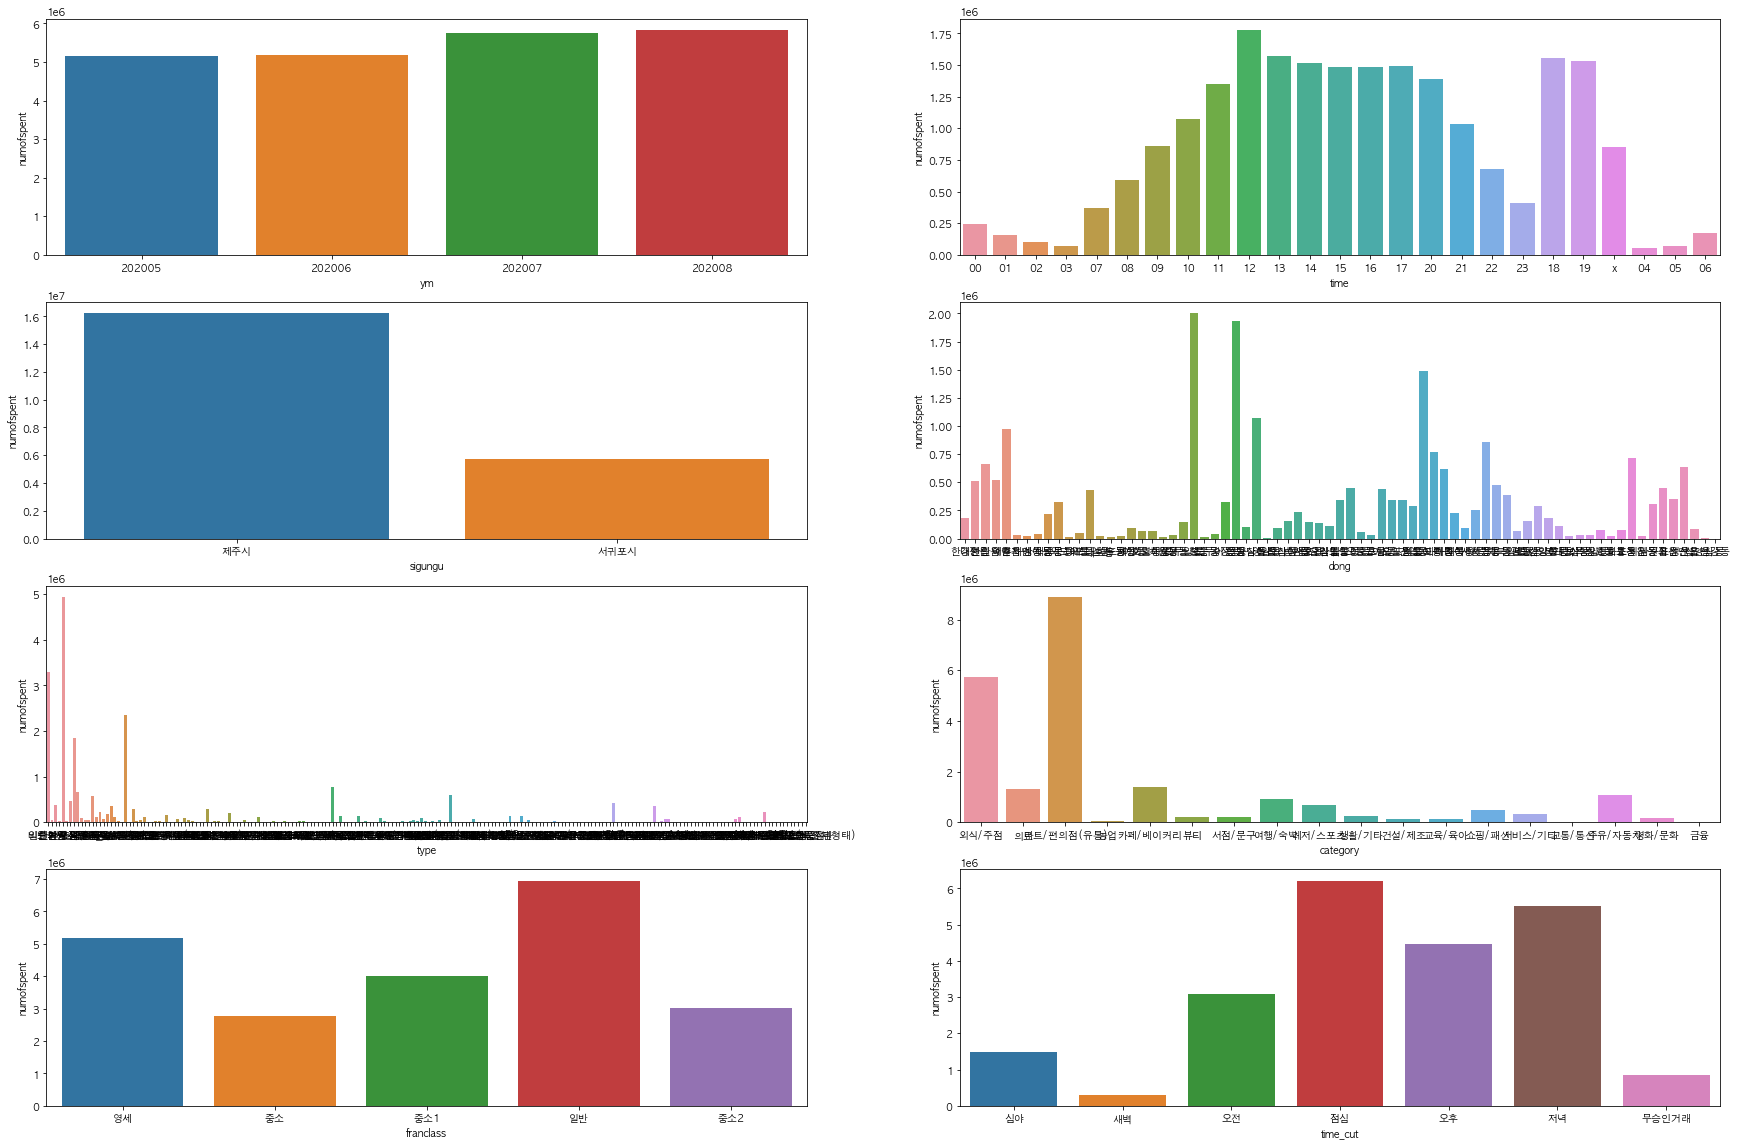

In [96]:
figure, ((ax1,ax2), (ax3,ax4),(ax5,ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(30, 20)

sns.barplot(data=jeju_all, x="ym", y="numofspent", ax=ax1, ci = None, estimator = sum)  # 월별 총사용금액 
sns.barplot(data=jeju_all, x="time", y="numofspent", ax=ax2, ci = None, estimator = sum)  # 시간대별 총 사용금액 
sns.barplot(data=jeju_all, x="sigungu", y="numofspent", ax=ax3, ci = None, estimator = sum) # 제주/서귀포 총 사용금액
sns.barplot(data=jeju_all, x="dong", y="numofspent", ax=ax4, ci = None, estimator = sum) # 읍면동별 총 사용금액 
sns.barplot(data=jeju_all, x="type", y="numofspent", ax=ax5, ci = None, estimator = sum) # 업종별 총 사용금액 
sns.barplot(data=jeju_all, x="category", y="numofspent", ax=ax6, ci = None, estimator = sum) # 업종구분별 총 사용금액 
sns.barplot(data=jeju_all, x="franclass", y="numofspent", ax=ax7, ci = None, estimator = sum) # 업체규모별 총 사용금액 
sns.barplot(data=jeju_all, x="time_cut", y="numofspent", ax=ax8, ci = None, estimator = sum) # 시간구분별 총 사용금액 

### disspent

<AxesSubplot:xlabel='time_cut', ylabel='disspent'>

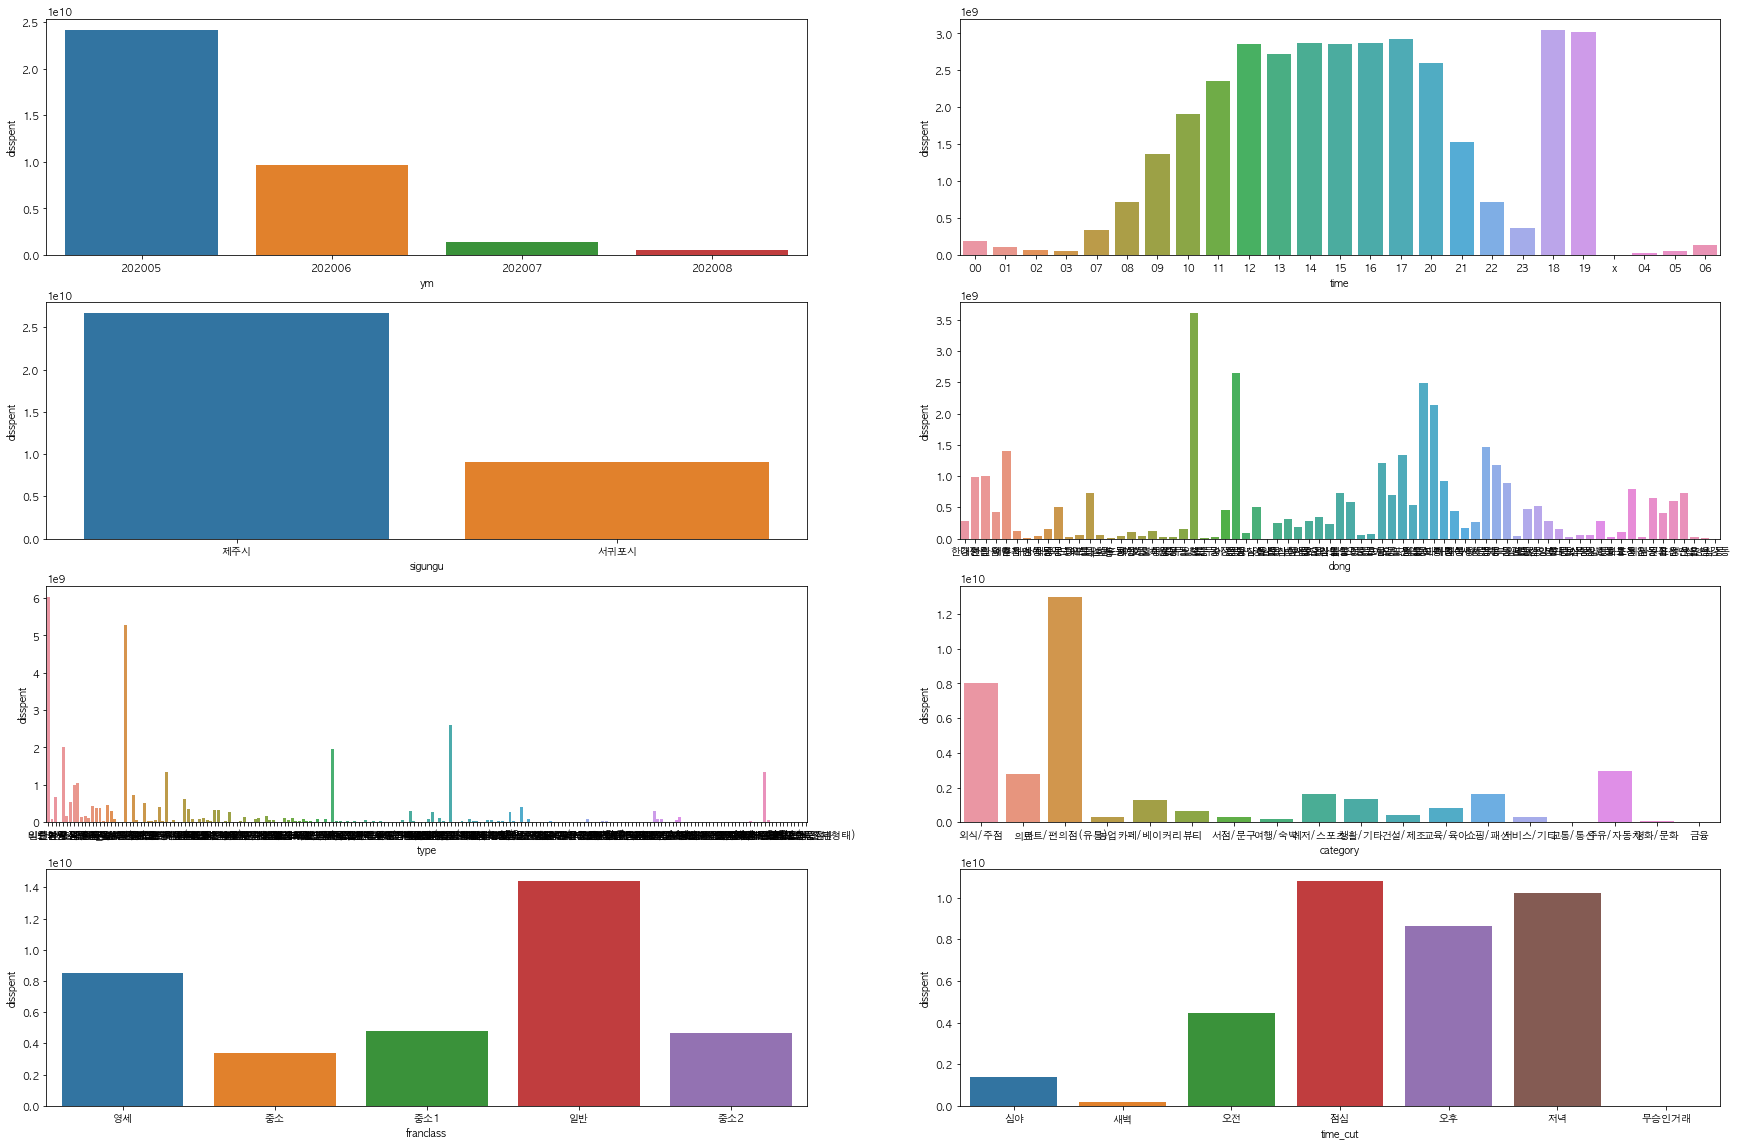

In [97]:
figure, ((ax1,ax2), (ax3,ax4),(ax5,ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(30, 20)

sns.barplot(data=jeju_all, x="ym", y="disspent", ax=ax1, ci = None, estimator = sum)  # 월별 총사용금액 
sns.barplot(data=jeju_all, x="time", y="disspent", ax=ax2, ci = None, estimator = sum)  # 시간대별 총 사용금액 
sns.barplot(data=jeju_all, x="sigungu", y="disspent", ax=ax3, ci = None, estimator = sum) # 제주/서귀포 총 사용금액
sns.barplot(data=jeju_all, x="dong", y="disspent", ax=ax4, ci = None, estimator = sum) # 읍면동별 총 사용금액 
sns.barplot(data=jeju_all, x="type", y="disspent", ax=ax5, ci = None, estimator = sum) # 업종별 총 사용금액 
sns.barplot(data=jeju_all, x="category", y="disspent", ax=ax6, ci = None, estimator = sum) # 업종구분별 총 사용금액 
sns.barplot(data=jeju_all, x="franclass", y="disspent", ax=ax7, ci = None, estimator = sum) # 업체규모별 총 사용금액 
sns.barplot(data=jeju_all, x="time_cut", y="disspent", ax=ax8, ci = None, estimator = sum) # 시간구분별 총 사용금액 

In [98]:
jeju_all.groupby(['ym'])['disspent'].sum().sort_values(ascending = False)/sum(jeju_all.disspent)*100

ym
202005    67.667563
202006    27.051105
202007     3.759923
202008     1.521409
Name: disspent, dtype: float64

In [99]:
jeju_all.groupby(['sigungu'])['disspent'].sum().sort_values(ascending = False)/sum(jeju_all.disspent)*100

sigungu
제주시     74.55913
서귀포시    25.44087
Name: disspent, dtype: float64

In [100]:
ratecal = jeju_all.groupby(['dong'])['disspent'].sum().sort_values(ascending = False)/sum(jeju_all.disspent)*100
ratecal[:10]

dong
노형동     10.076164
연동       7.431243
이도이동     6.955406
일도이동     5.984075
서귀동      4.118233
애월읍      3.933288
일도일동     3.741783
도남동      3.377946
동홍동      3.306647
한림읍      2.780351
Name: disspent, dtype: float64

In [101]:
jeju_all.groupby(['category'])['disspent'].sum().sort_values(ascending = False)/sum(jeju_all.disspent)*100

category
마트/편의점(유통)    36.332075
외식/주점         22.518048
주유/자동차         8.214839
의료             7.852950
레저/스포츠         4.587008
쇼핑/패션          4.580789
생활/기타          3.727703
카페/베이커리        3.536720
교육/육아          2.307204
뷰티             1.770915
건설/제조          1.220111
농업             0.915798
서비스/기타         0.847735
서점/문구          0.828702
여행/숙박          0.537871
영화/문화          0.174698
교통/통신          0.044961
금융             0.001874
Name: disspent, dtype: float64

In [102]:
ratecal = jeju_all.groupby(['type'])['disspent'].sum().sort_values(ascending = False)/sum(jeju_all.disspent)*100
ratecal[:10]

type
일반한식       16.865014
슈퍼마켓       14.763131
농축협직영매장     7.302995
편의점         5.660579
주유소         5.492984
농협하나로클럽     3.795214
스포츠레져용품     3.750210
약국          2.956306
서양음식        2.817611
농축수산품       2.061817
Name: disspent, dtype: float64

### numofdisspent

<AxesSubplot:xlabel='time_cut', ylabel='numofdisspent'>

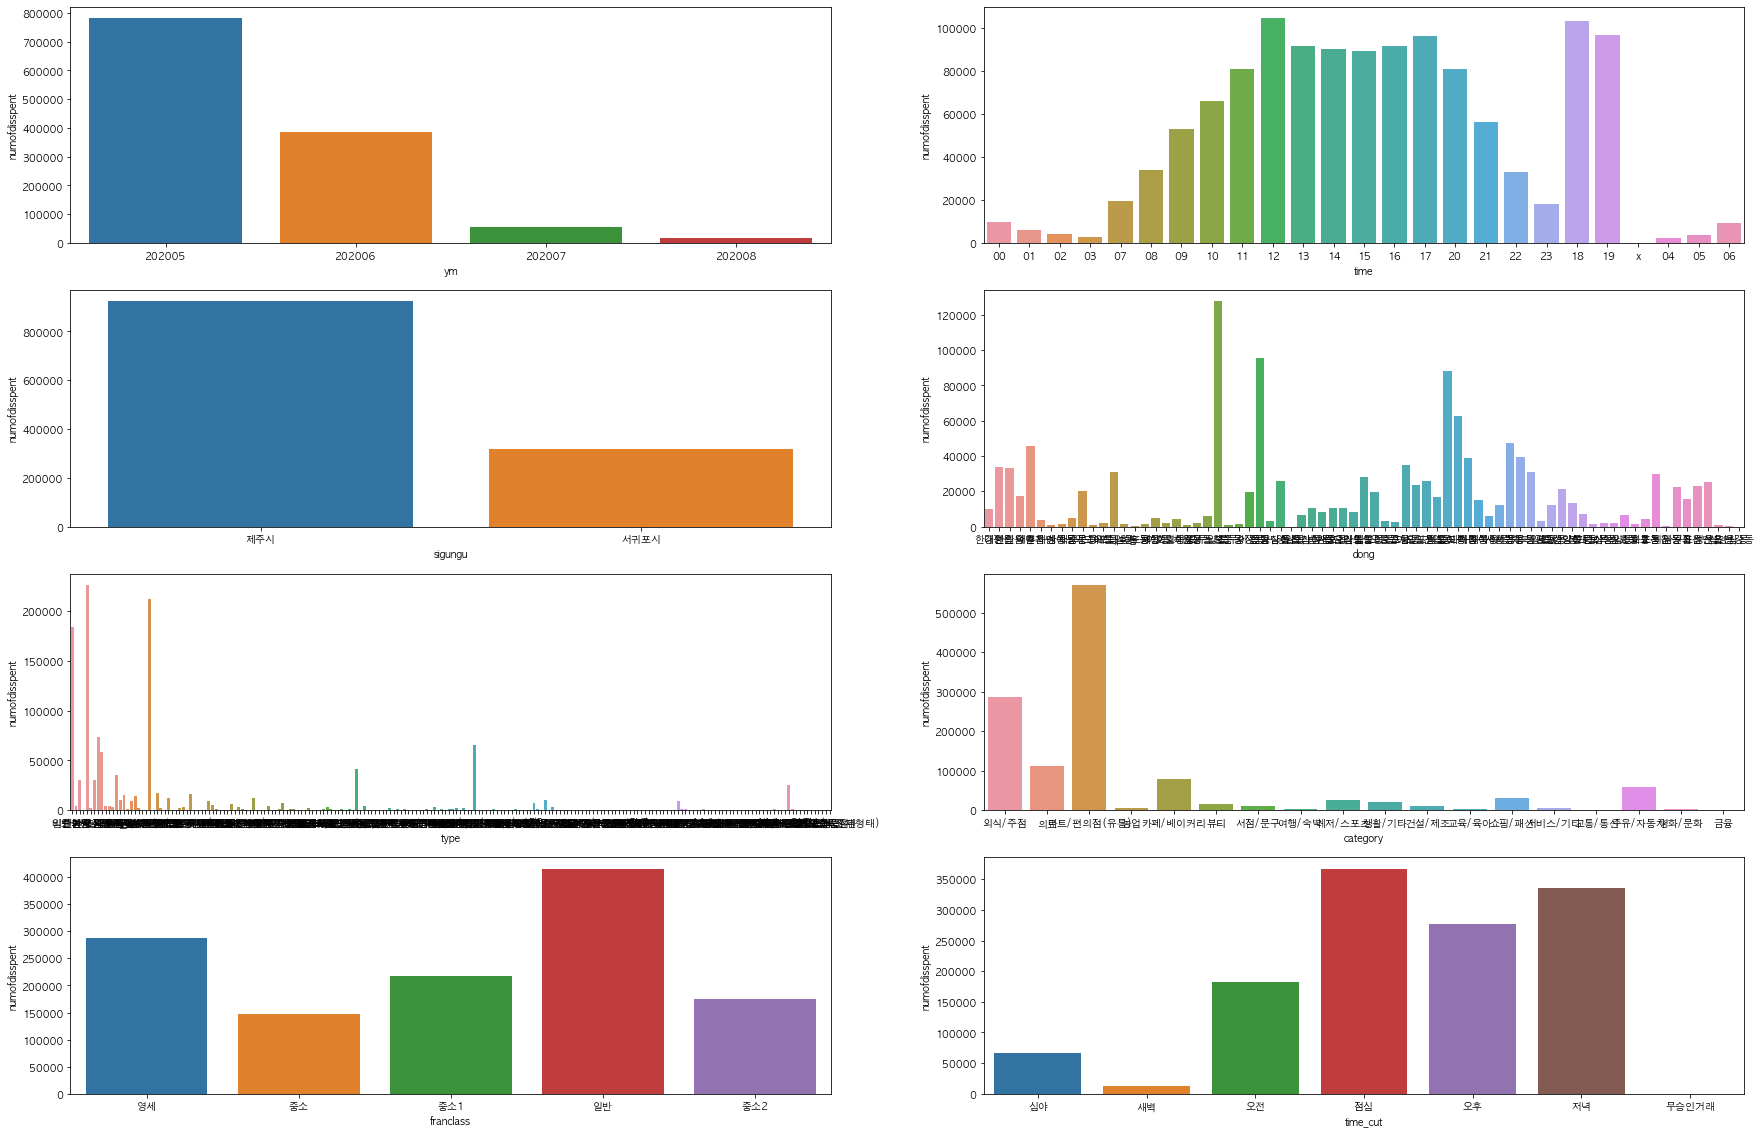

In [103]:
figure, ((ax1,ax2), (ax3,ax4),(ax5,ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(30, 20)

sns.barplot(data=jeju_all, x="ym", y="numofdisspent", ax=ax1, ci = None, estimator = sum)  # 월별 총사용금액 
sns.barplot(data=jeju_all, x="time", y="numofdisspent", ax=ax2, ci = None, estimator = sum)  # 시간대별 총 사용금액 
sns.barplot(data=jeju_all, x="sigungu", y="numofdisspent", ax=ax3, ci = None, estimator = sum) # 제주/서귀포 총 사용금액
sns.barplot(data=jeju_all, x="dong", y="numofdisspent", ax=ax4, ci = None, estimator = sum) # 읍면동별 총 사용금액 
sns.barplot(data=jeju_all, x="type", y="numofdisspent", ax=ax5, ci = None, estimator = sum) # 업종별 총 사용금액 
sns.barplot(data=jeju_all, x="category", y="numofdisspent", ax=ax6, ci = None, estimator = sum) # 업종구분별 총 사용금액 
sns.barplot(data=jeju_all, x="franclass", y="numofdisspent", ax=ax7, ci = None, estimator = sum) # 업체규모별 총 사용금액 
sns.barplot(data=jeju_all, x="time_cut", y="numofdisspent", ax=ax8, ci = None, estimator = sum) # 시간구분별 총 사용금액 

### tot_dis

<AxesSubplot:xlabel='time_cut', ylabel='tot_dis'>

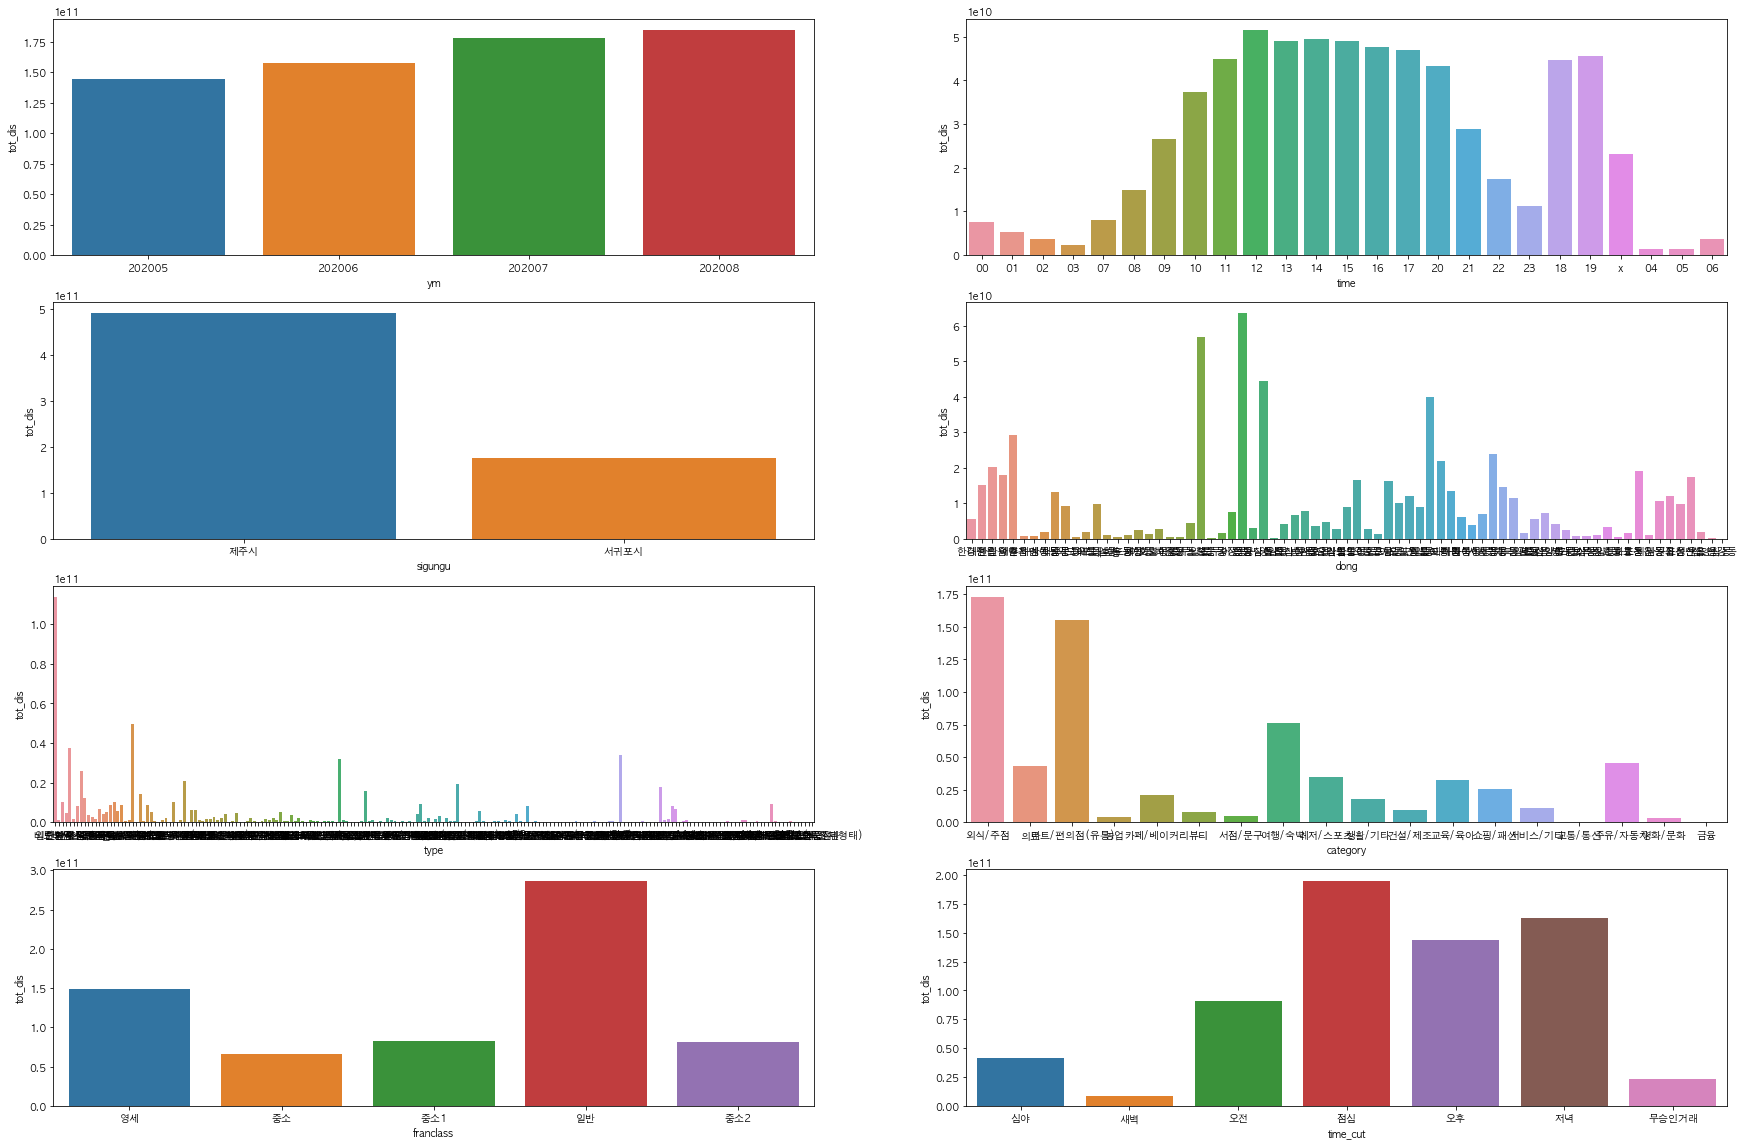

In [104]:
figure, ((ax1,ax2), (ax3,ax4),(ax5,ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(30, 20)

sns.barplot(data=jeju_all, x="ym", y="tot_dis", ax=ax1, ci = None, estimator = sum)  # 월별 총사용금액 
sns.barplot(data=jeju_all, x="time", y="tot_dis", ax=ax2, ci = None, estimator = sum)  # 시간대별 총 사용금액 
sns.barplot(data=jeju_all, x="sigungu", y="tot_dis", ax=ax3, ci = None, estimator = sum) # 제주/서귀포 총 사용금액
sns.barplot(data=jeju_all, x="dong", y="tot_dis", ax=ax4, ci = None, estimator = sum) # 읍면동별 총 사용금액 
sns.barplot(data=jeju_all, x="type", y="tot_dis", ax=ax5, ci = None, estimator = sum) # 업종별 총 사용금액 
sns.barplot(data=jeju_all, x="category", y="tot_dis", ax=ax6, ci = None, estimator = sum) # 업종구분별 총 사용금액 
sns.barplot(data=jeju_all, x="franclass", y="tot_dis", ax=ax7, ci = None, estimator = sum) # 업체규모별 총 사용금액 
sns.barplot(data=jeju_all, x="time_cut", y="tot_dis", ax=ax8, ci = None, estimator = sum) # 시간구분별 총 사용금액 

In [105]:
ratecal = jeju_all.groupby(['type'])['tot_dis'].sum().sort_values(ascending = False)/sum(jeju_all.tot_dis)*100
ratecal[:10]

type
일반한식       17.114093
슈퍼마켓        7.433304
편의점         5.634968
면세점         5.093196
주유소         4.767288
서양음식        3.888278
유아원         3.154739
농축협직영매장     2.883445
대형할인점       2.689273
골프경기장       2.383894
Name: tot_dis, dtype: float64

### 3.3.2 Micro
spent = ['totalspent','disspent','numofspent','numofdisspent', 'tot_dis', 'num_tot_dis']  
key = ['sigungu', 'ym', 'type','time','franclass','dong','category', 'time_cut']  
- 'totalspent' in 'ym', 'time', 'time_cut'
  - 시간별 업종구분, 업종, 지역/동의 사용금액 변화추이
  - 'category'
  - 'type'
  - 'dong'
- 'disspent' in 'ym', 'time', 'time_cut'
  - 'category'
  - 'type'
  - 'dong' 
- 'numofspent' in 'ym', 'time', 'time_cut'
  - 'category'
  - 'type'
  - 'dong'
- 'numofdisspent' in 'ym', 'time', 'time_cut'
  - 'category'
  - 'type'
  - 'dong' 

### category
- 'category' + times + spent

In [106]:
spent = ['totalspent', 'disspent', 'numofspent', 'numofdisspent']

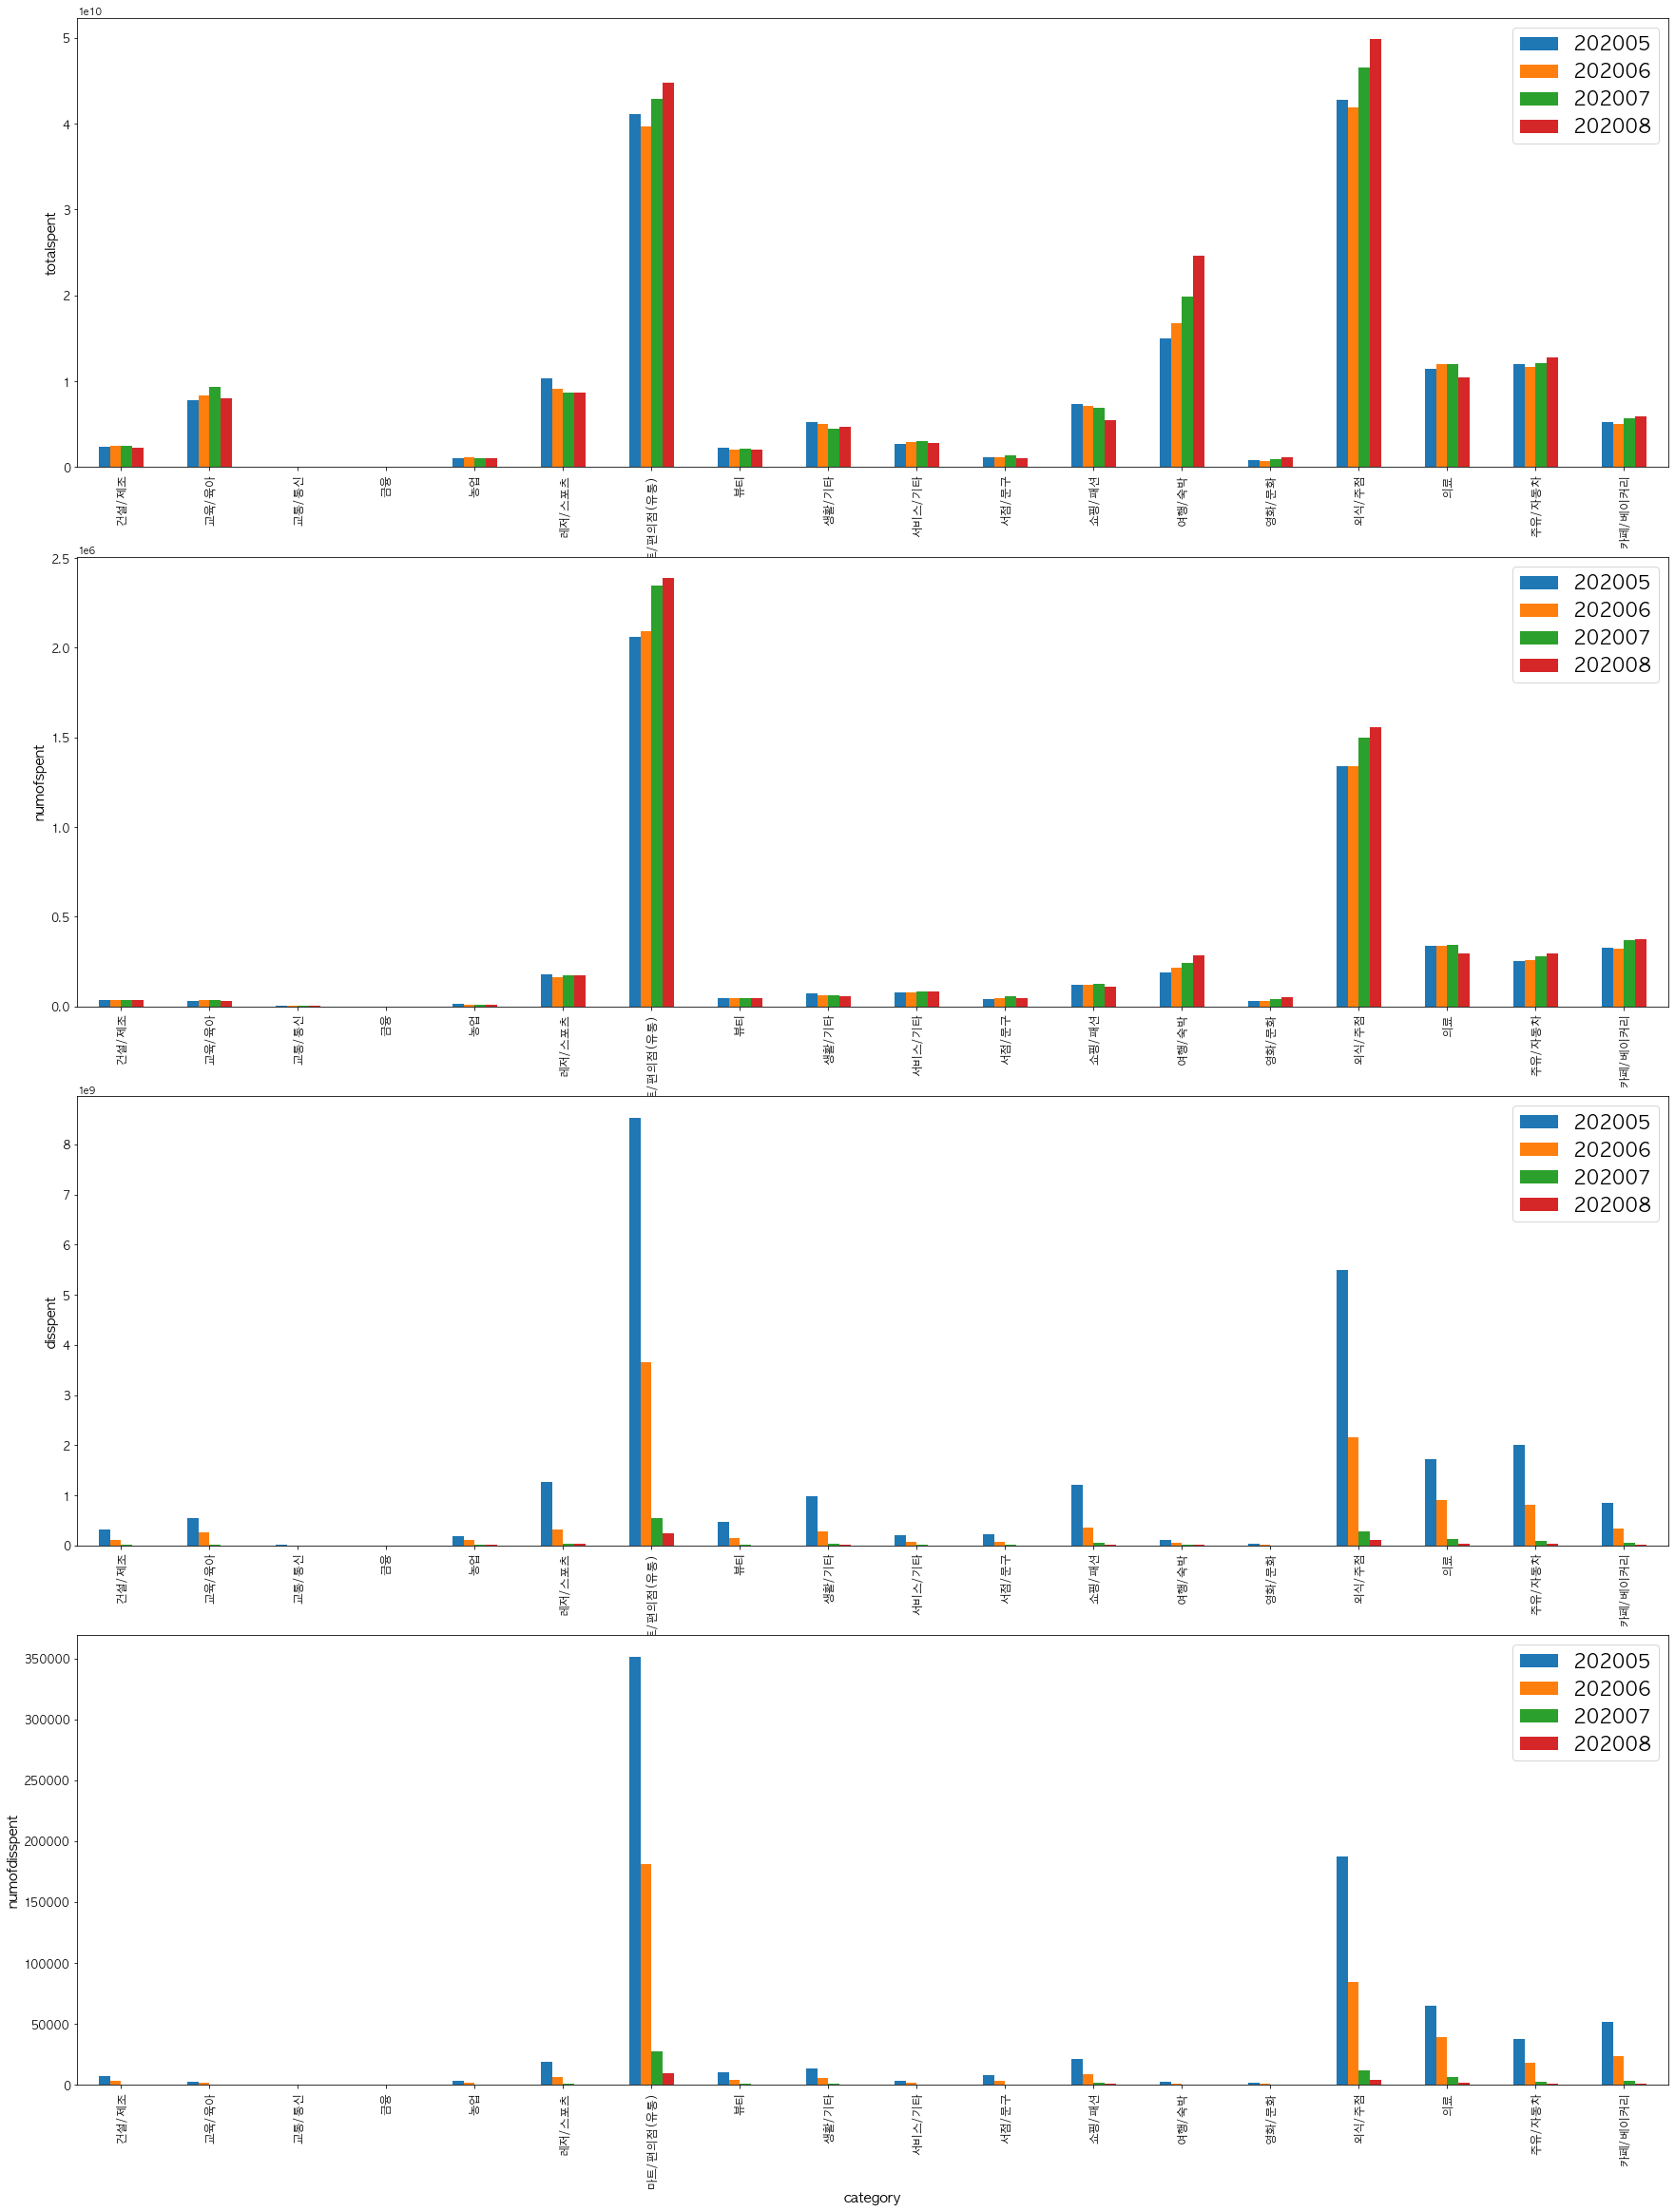

In [107]:
# 'category' & 'ym' + spent
def vis1(x, y, z, agg) :
    figure, (ax1,ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
    figure.set_size_inches(30, 40)
    
    for i, j in zip(y, [ax1, ax3, ax2, ax4]) :
        df1 = jeju_all.pivot_table(values = i, index = x, columns = z, aggfunc = 'sum')
        
        df1.plot(kind = 'bar', fontsize = 12, ax = j)
        j.set_xlabel(x, size = 15)
        j.set_ylabel(i, size = 15)
        j.legend(fontsize = 20)

vis1('category', spent, 'ym', 'sum')

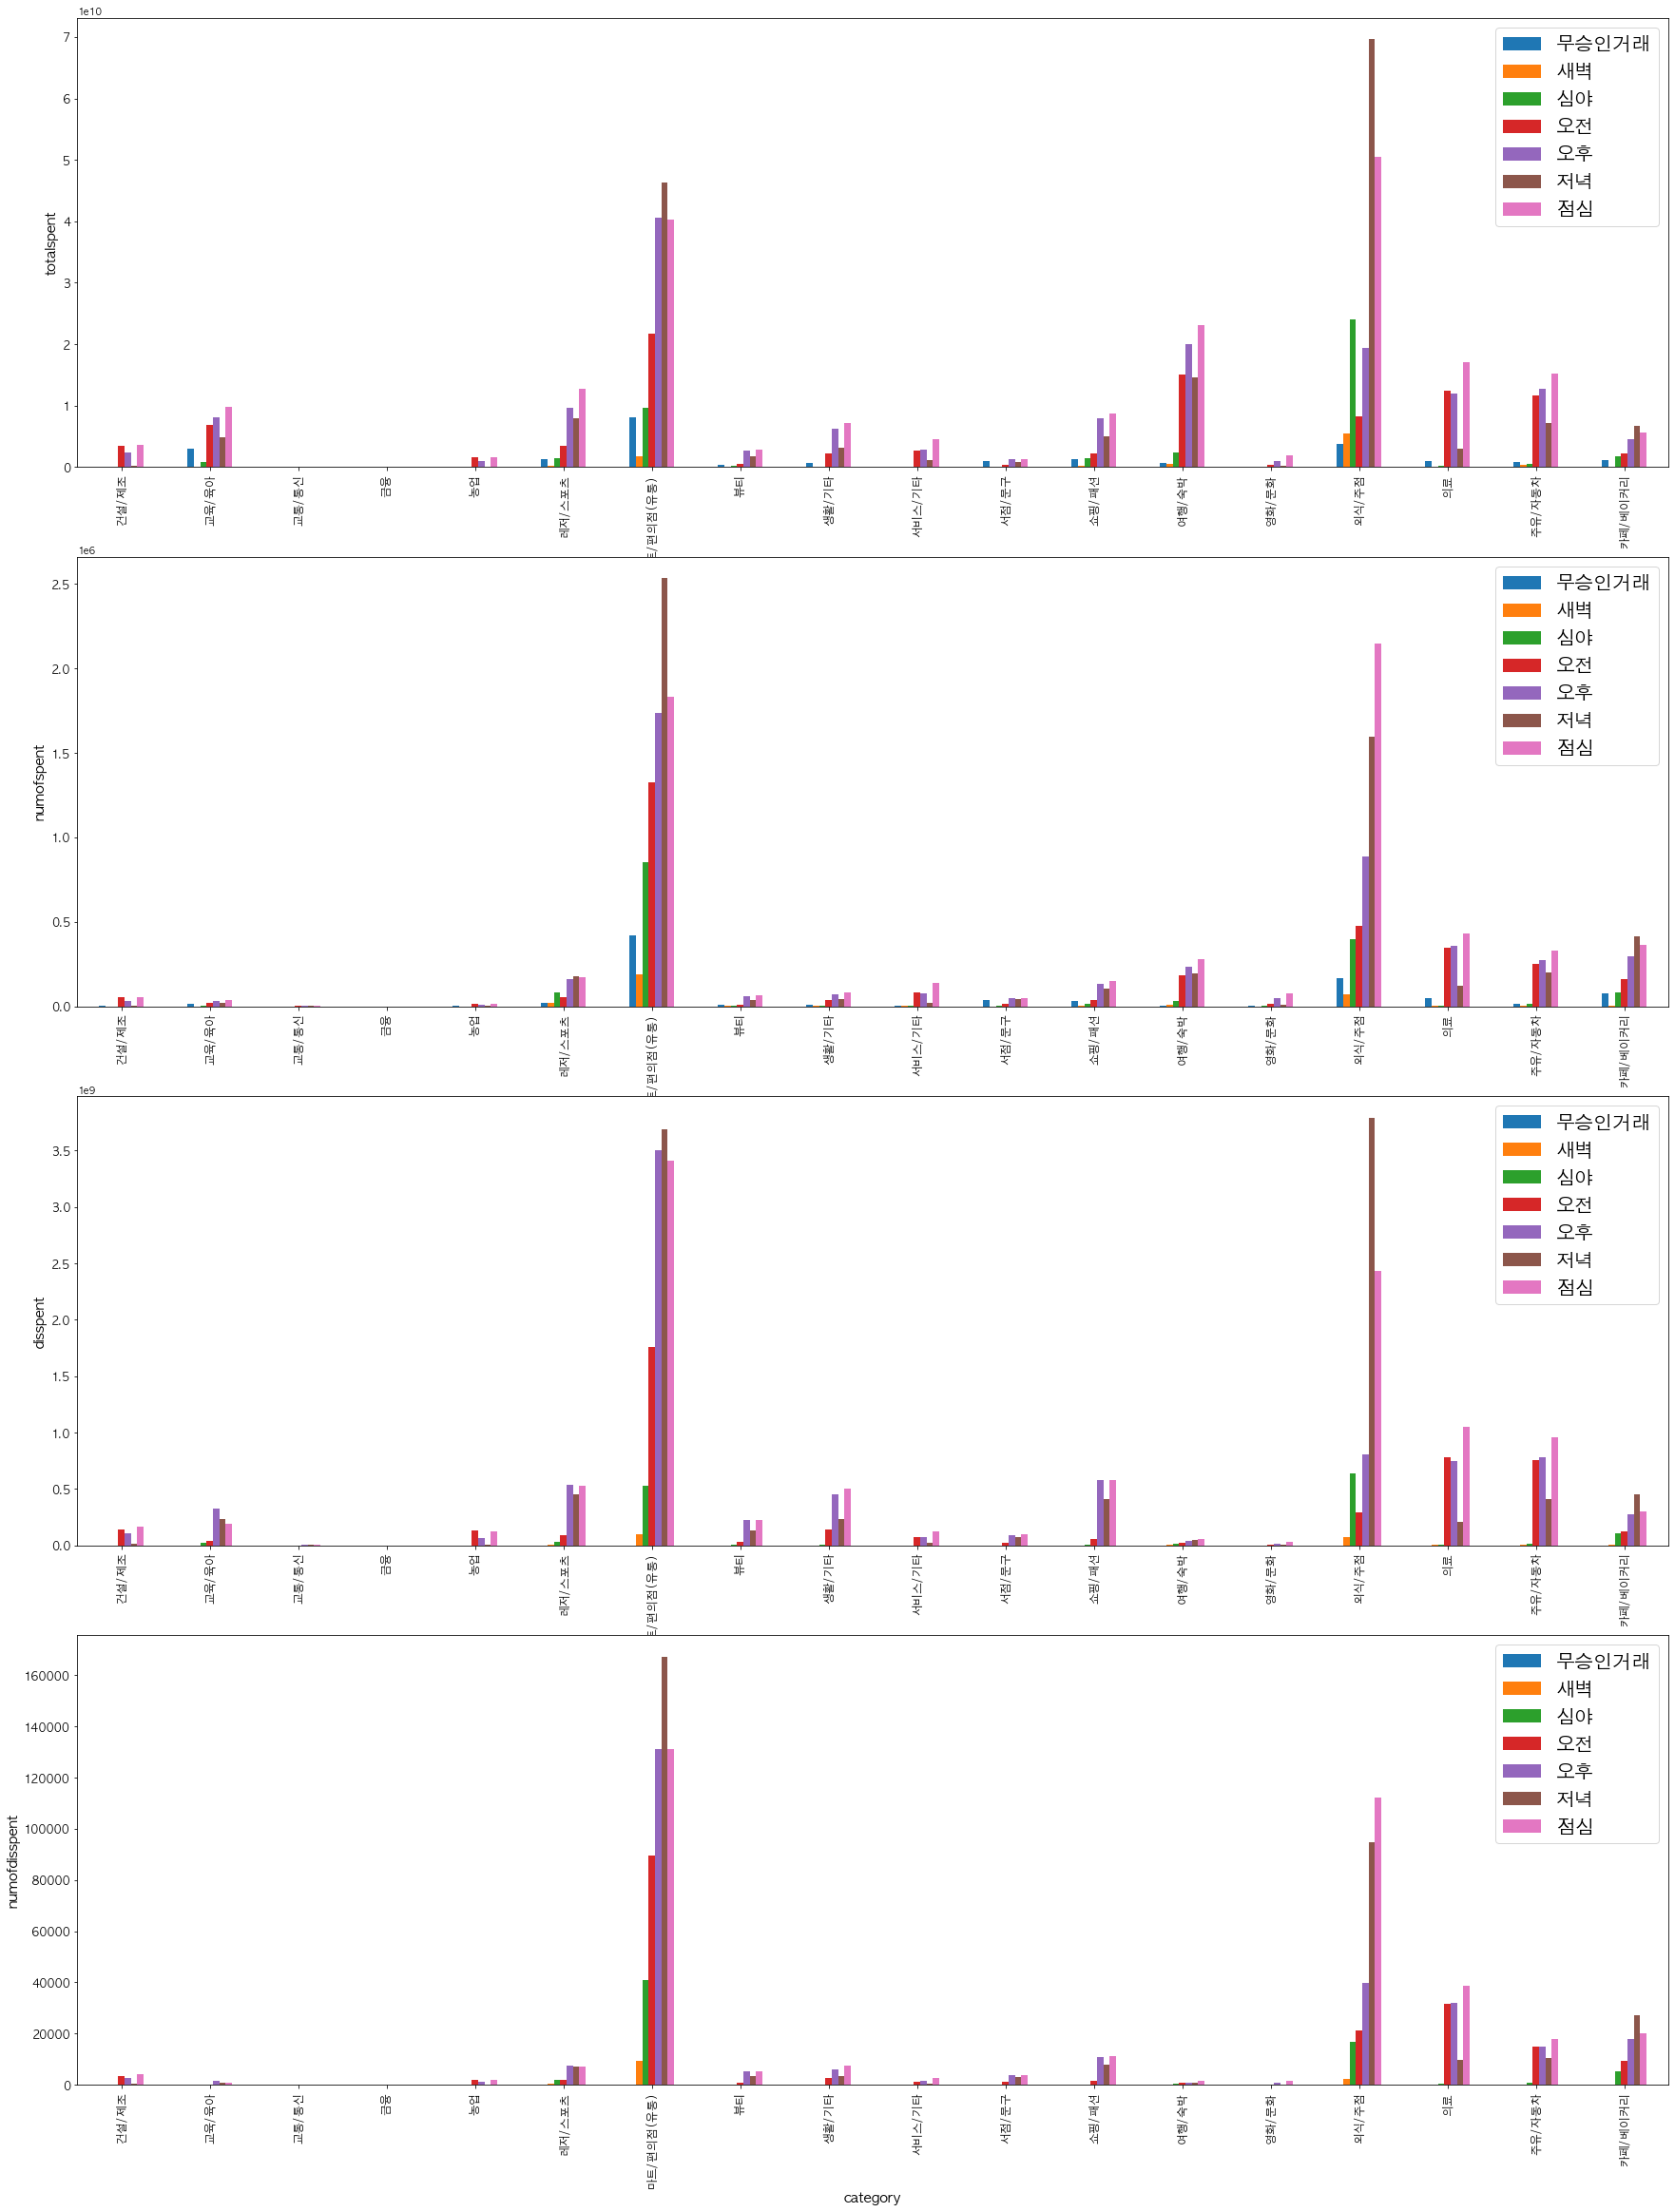

In [108]:
# 'category' & 'time_cut' + spent
def vis1(x, y, z, agg) :
    figure, (ax1,ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
    figure.set_size_inches(30, 40)
    
    for i, j in zip(y, [ax1, ax3, ax2, ax4]) :
        df1 = jeju_all.pivot_table(values = i, index = x, columns = z, aggfunc = 'sum')
        
        df1.plot(kind = 'bar', fontsize = 12, ax = j)
        j.set_xlabel(x, size = 15)
        j.set_ylabel(i, size = 15)
        j.legend(fontsize = 20)

vis1('category', spent, 'time_cut', 'sum')

### type
- 'type' + times + spent

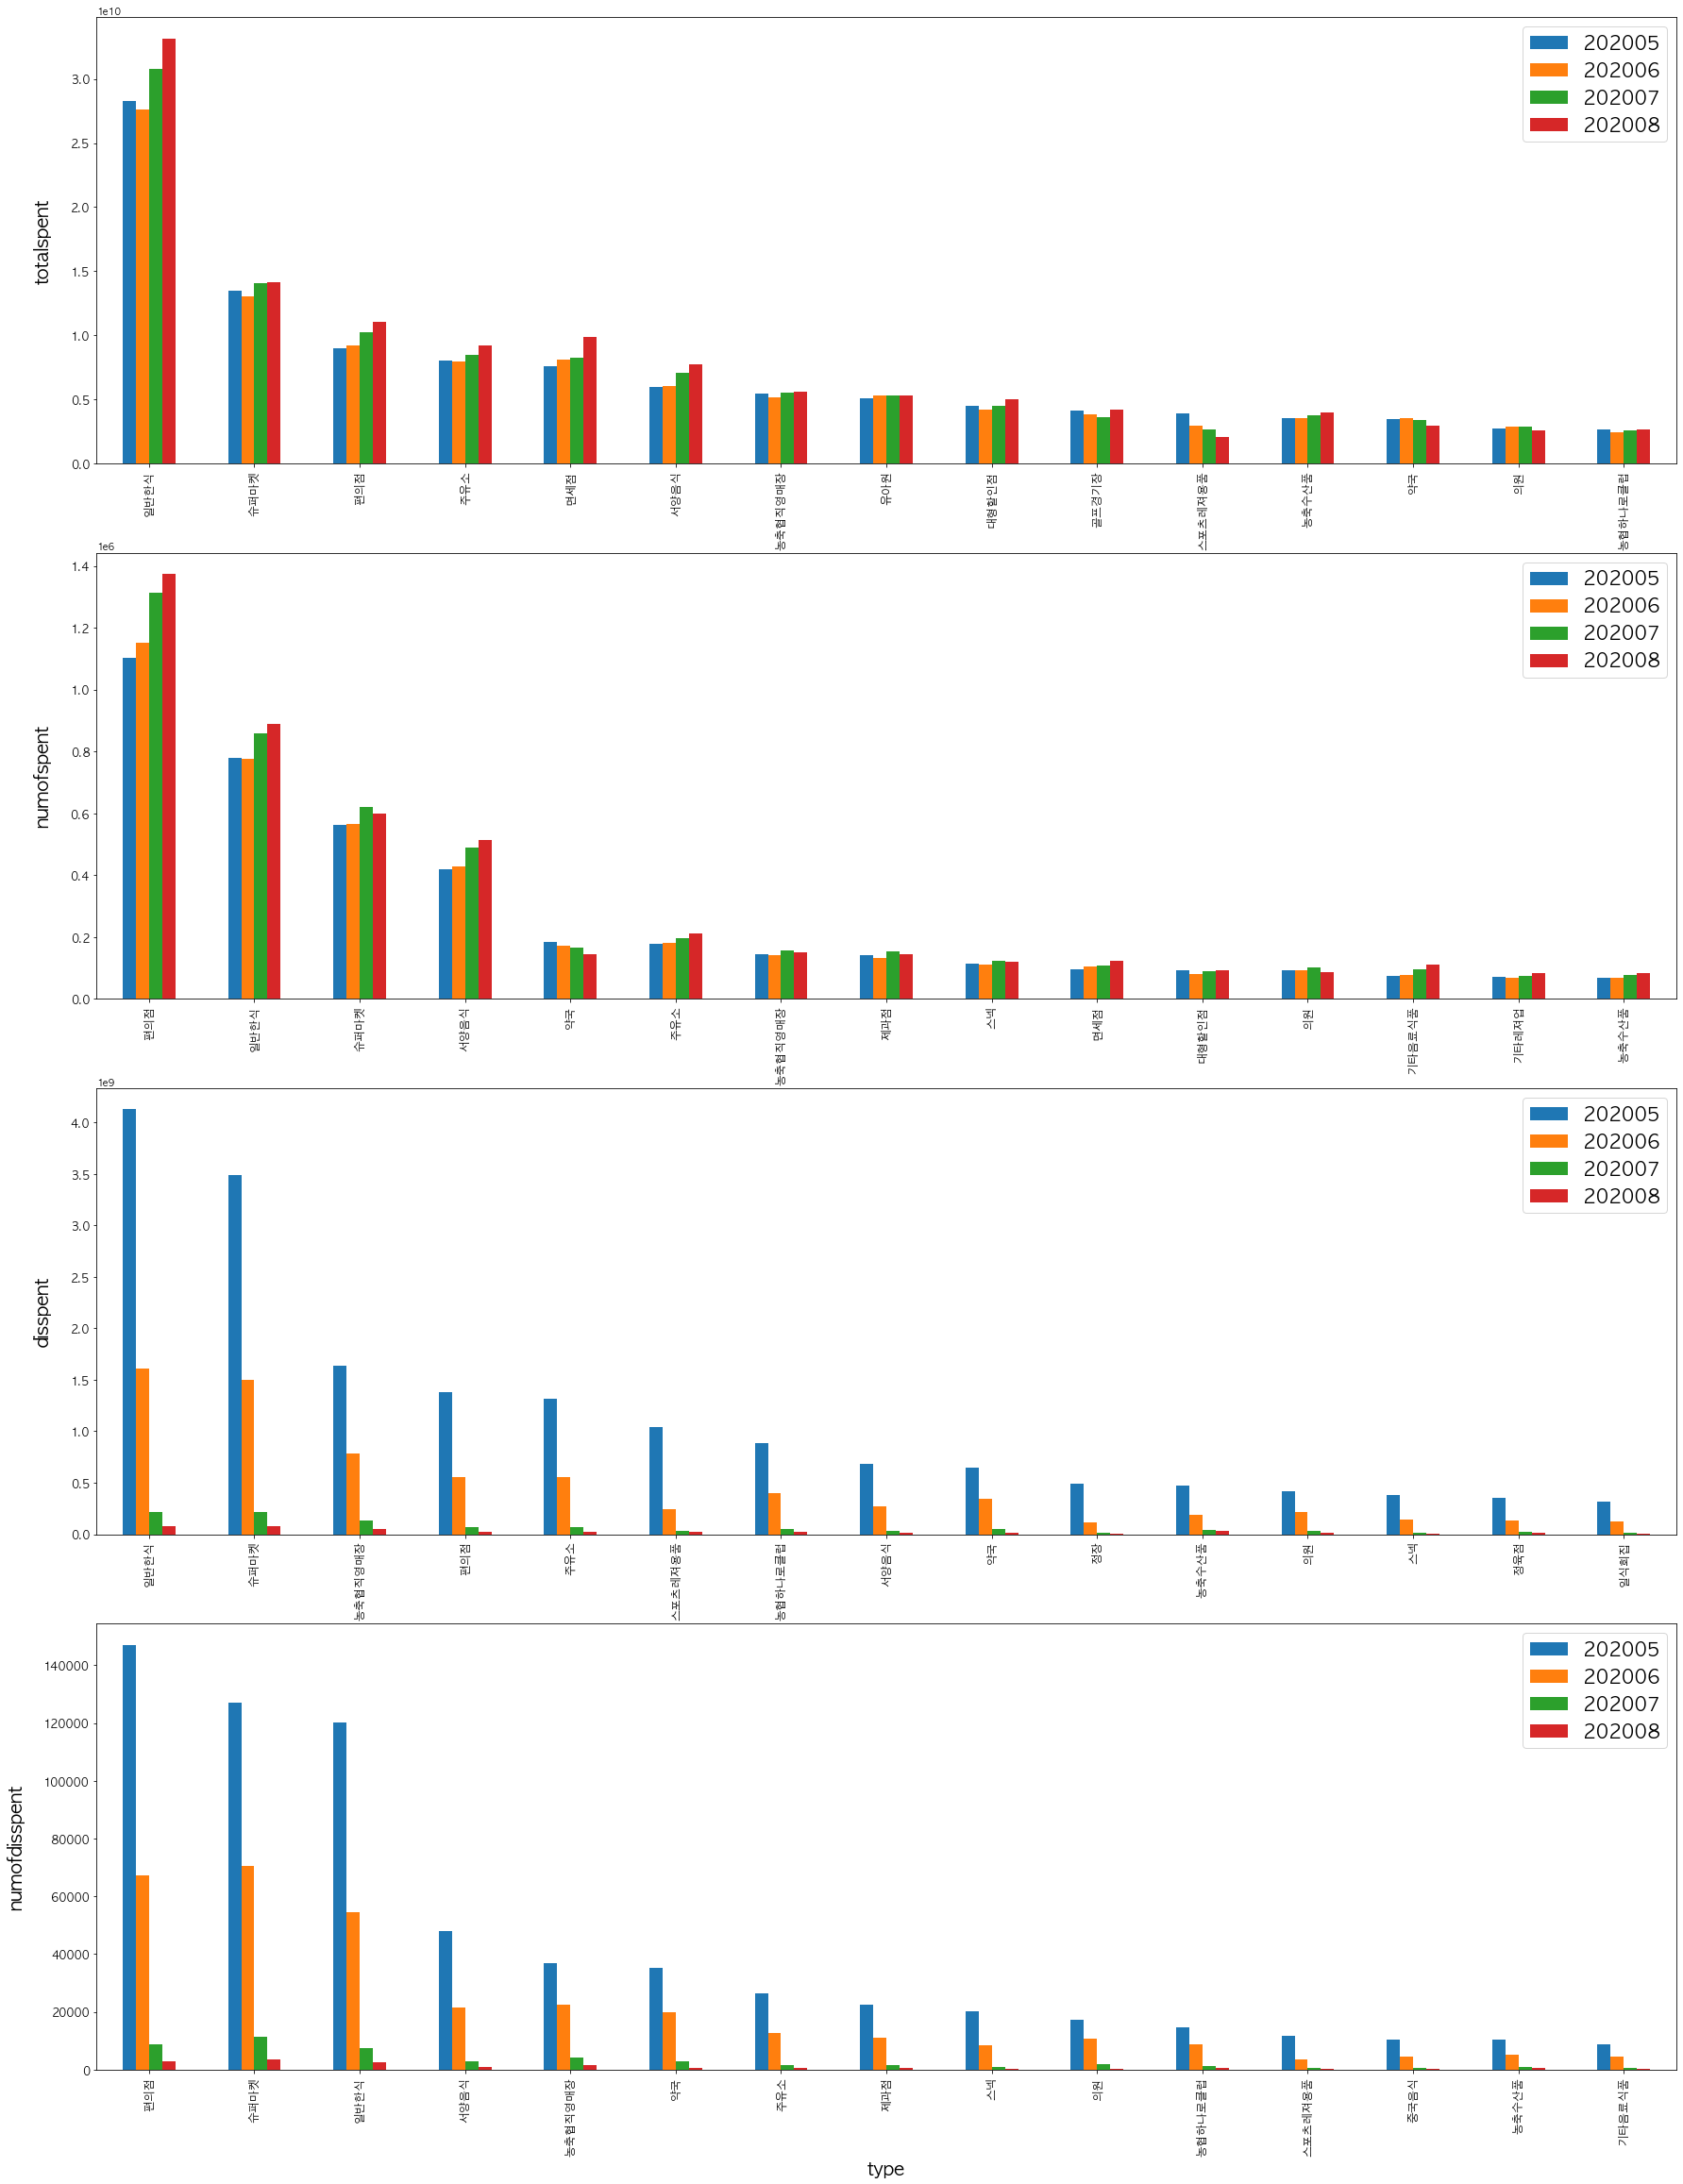

In [109]:
# 'type' & 'ym' + spent
def vis2(x, y, z, w, agg) :
    figure, (ax1,ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
    figure.set_size_inches(30, 40)
    
    for i, j in zip(y, [ax1, ax3, ax2, ax4]) :
        df1 = jeju_all.pivot_table(values = i, index = x, columns = z, aggfunc = 'sum')
        
        df1.sort_values(by = w, ascending = False)[:15].plot(kind = 'bar', fontsize = 12, ax = j)
        j.set_xlabel(x, size = 20)
        j.set_ylabel(i, labelpad = 20, size = 20)
        j.legend(fontsize = 20)

vis2('type', spent, 'ym', 202005, 'sum')

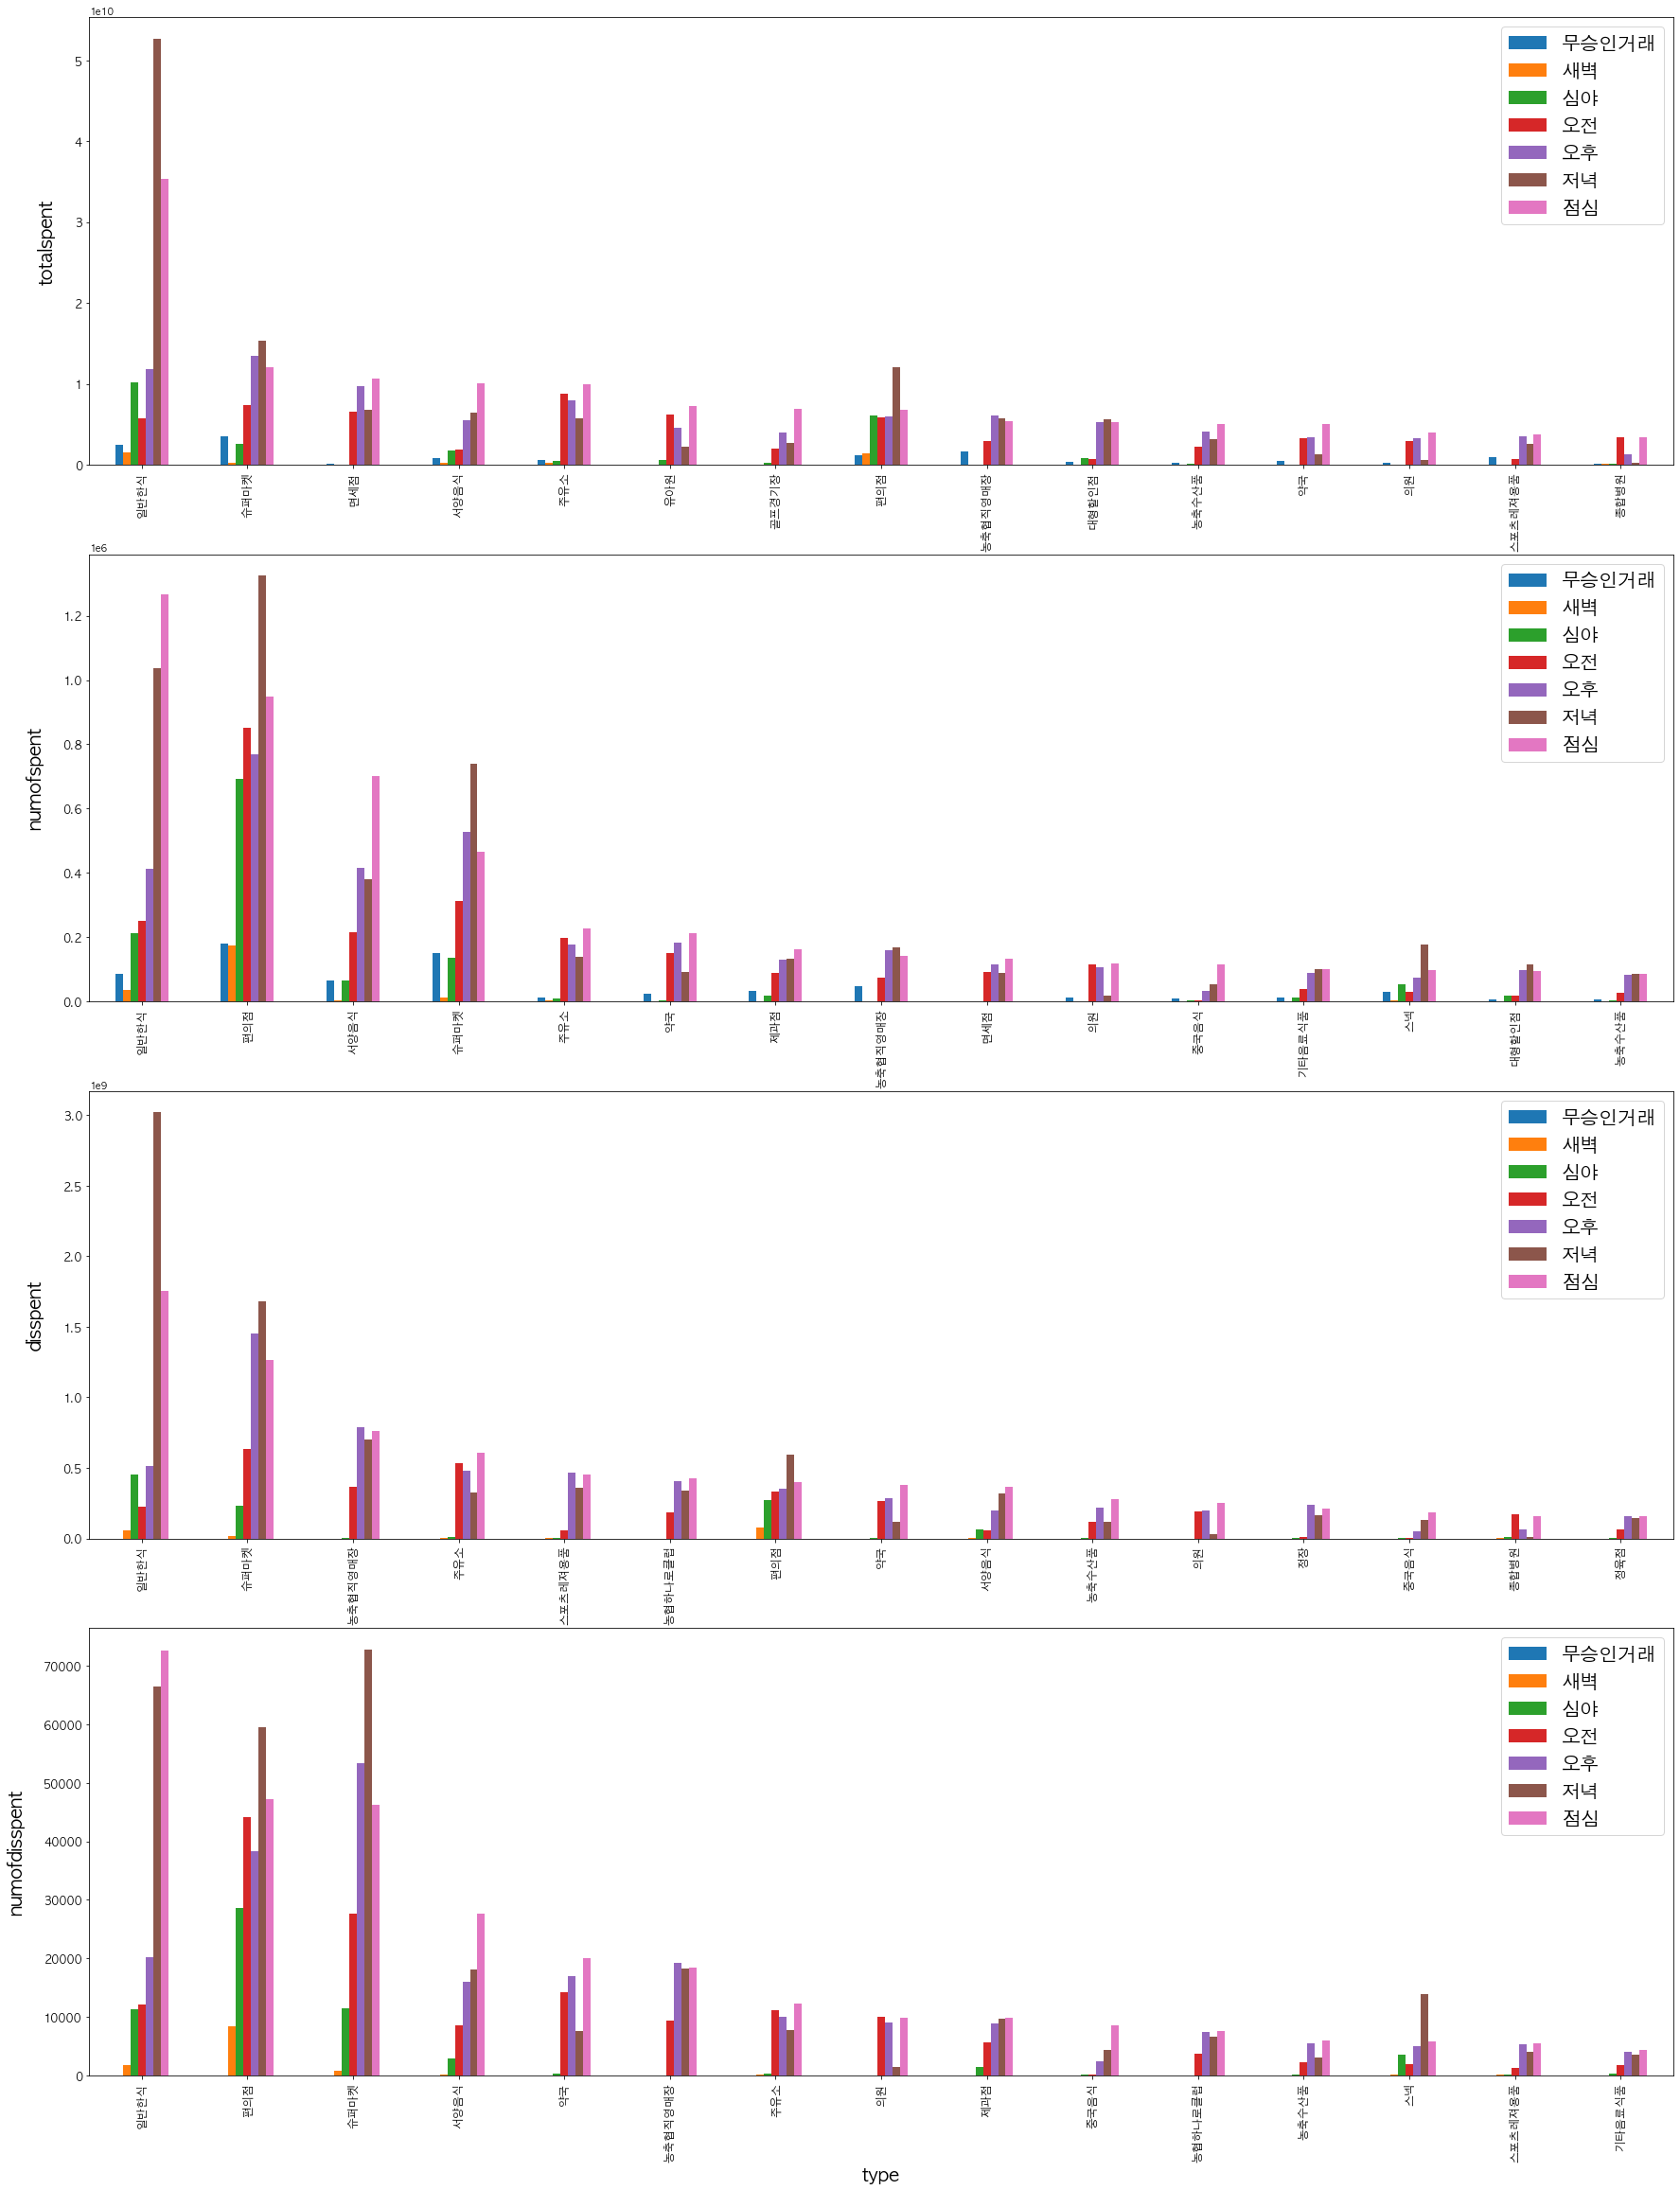

In [110]:
# 'type' & 'time_cut' + spent
def vis2(x, y, z, w, agg) :
    figure, (ax1, ax3, ax2, ax4) = plt.subplots(nrows=4, ncols=1)
    figure.set_size_inches(30, 40)
    
    for i, j in zip(y, [ax1, ax2, ax3, ax4]) :
        df1 = jeju_all.pivot_table(values = i, index = x, columns = z, aggfunc = 'sum')
        
        df1.sort_values(by = w, ascending = False)[:15].plot(kind = 'bar', fontsize = 12, ax = j)
        j.set_xlabel(x, size = 20)
        j.set_ylabel(i, labelpad = 20, size = 20)
        j.legend(fontsize = 20)

vis2('type', spent, 'time_cut', '점심', 'sum')

### dong
- 'dong' + times + spent

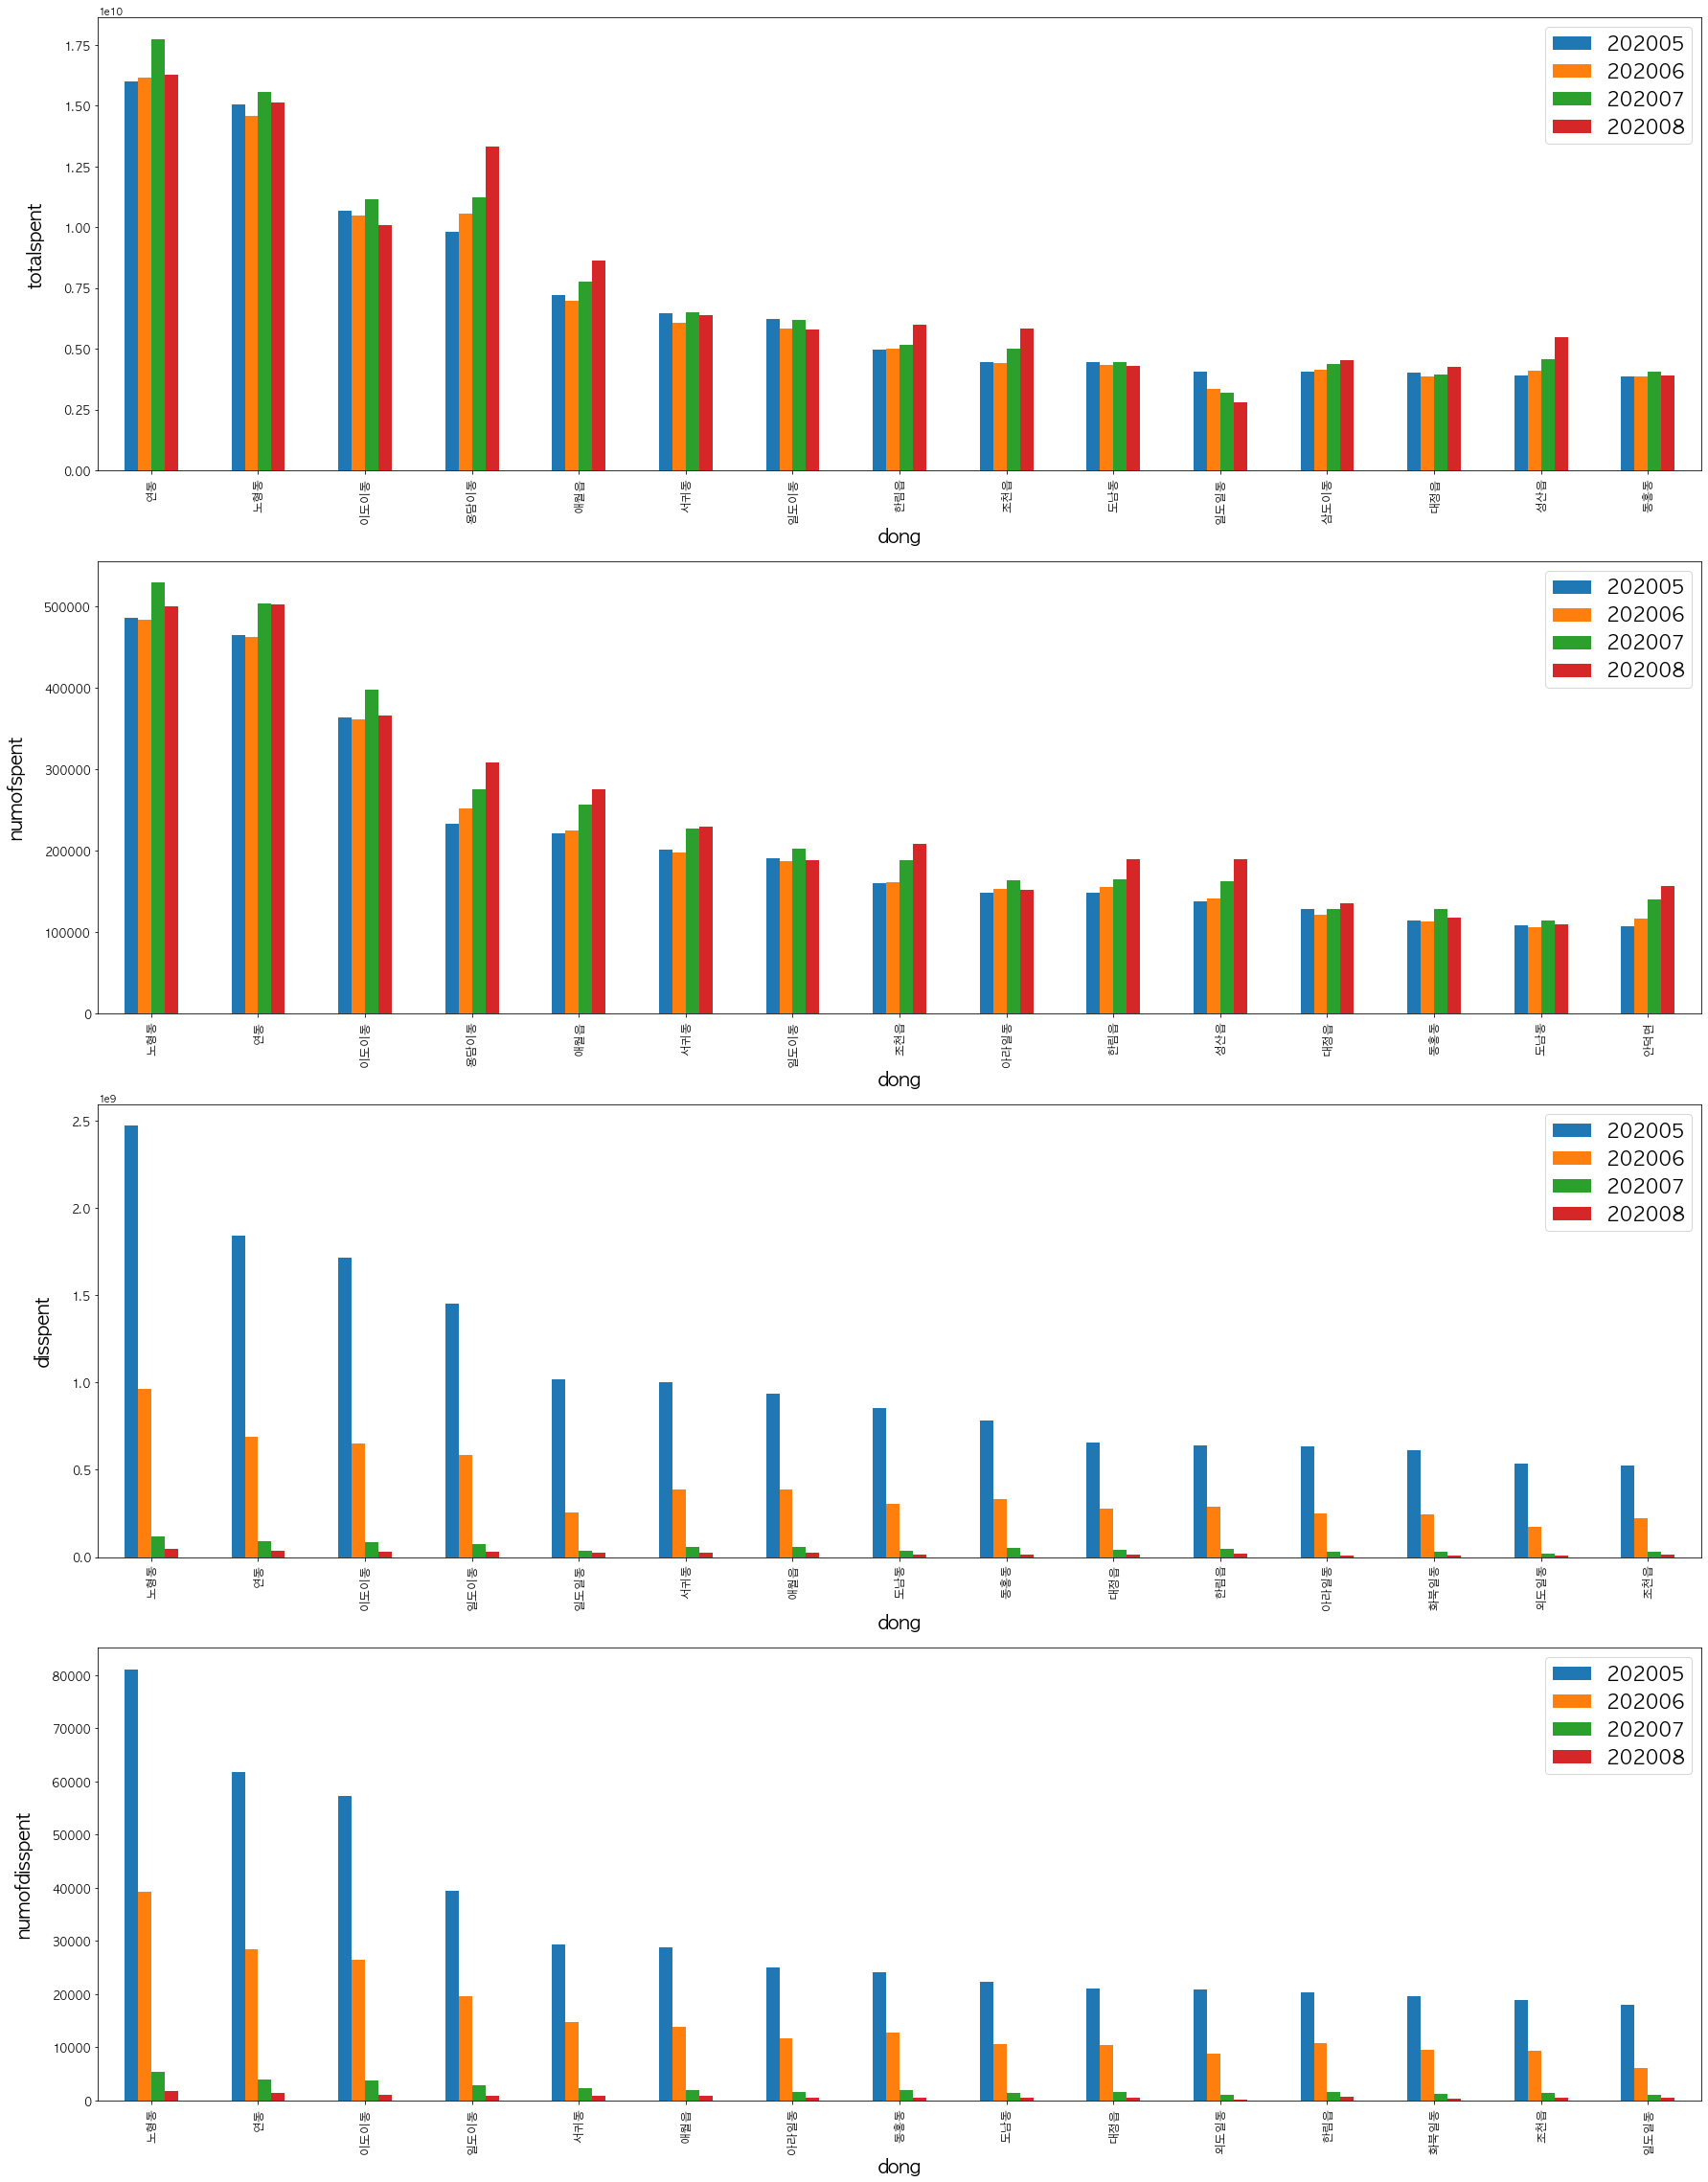

In [111]:
# 'dong' & 'ym' + spent
def vis2(x, y, z, w, agg) :
    figure, (ax1,ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
    figure.set_size_inches(30, 40)
    
    for i, j in zip(y, [ax1, ax3, ax2, ax4]) :
        df1 = jeju_all.pivot_table(values = i, index = x, columns = z, aggfunc = 'sum')
        
        df1.sort_values(by = w, ascending = False)[:15].plot(kind = 'bar', fontsize = 12, ax = j)
        j.set_xlabel(x, size = 20)
        j.set_ylabel(i, labelpad = 20, size = 20)
        j.legend(fontsize = 20)

vis2('dong', spent, 'ym', 202005, 'sum')

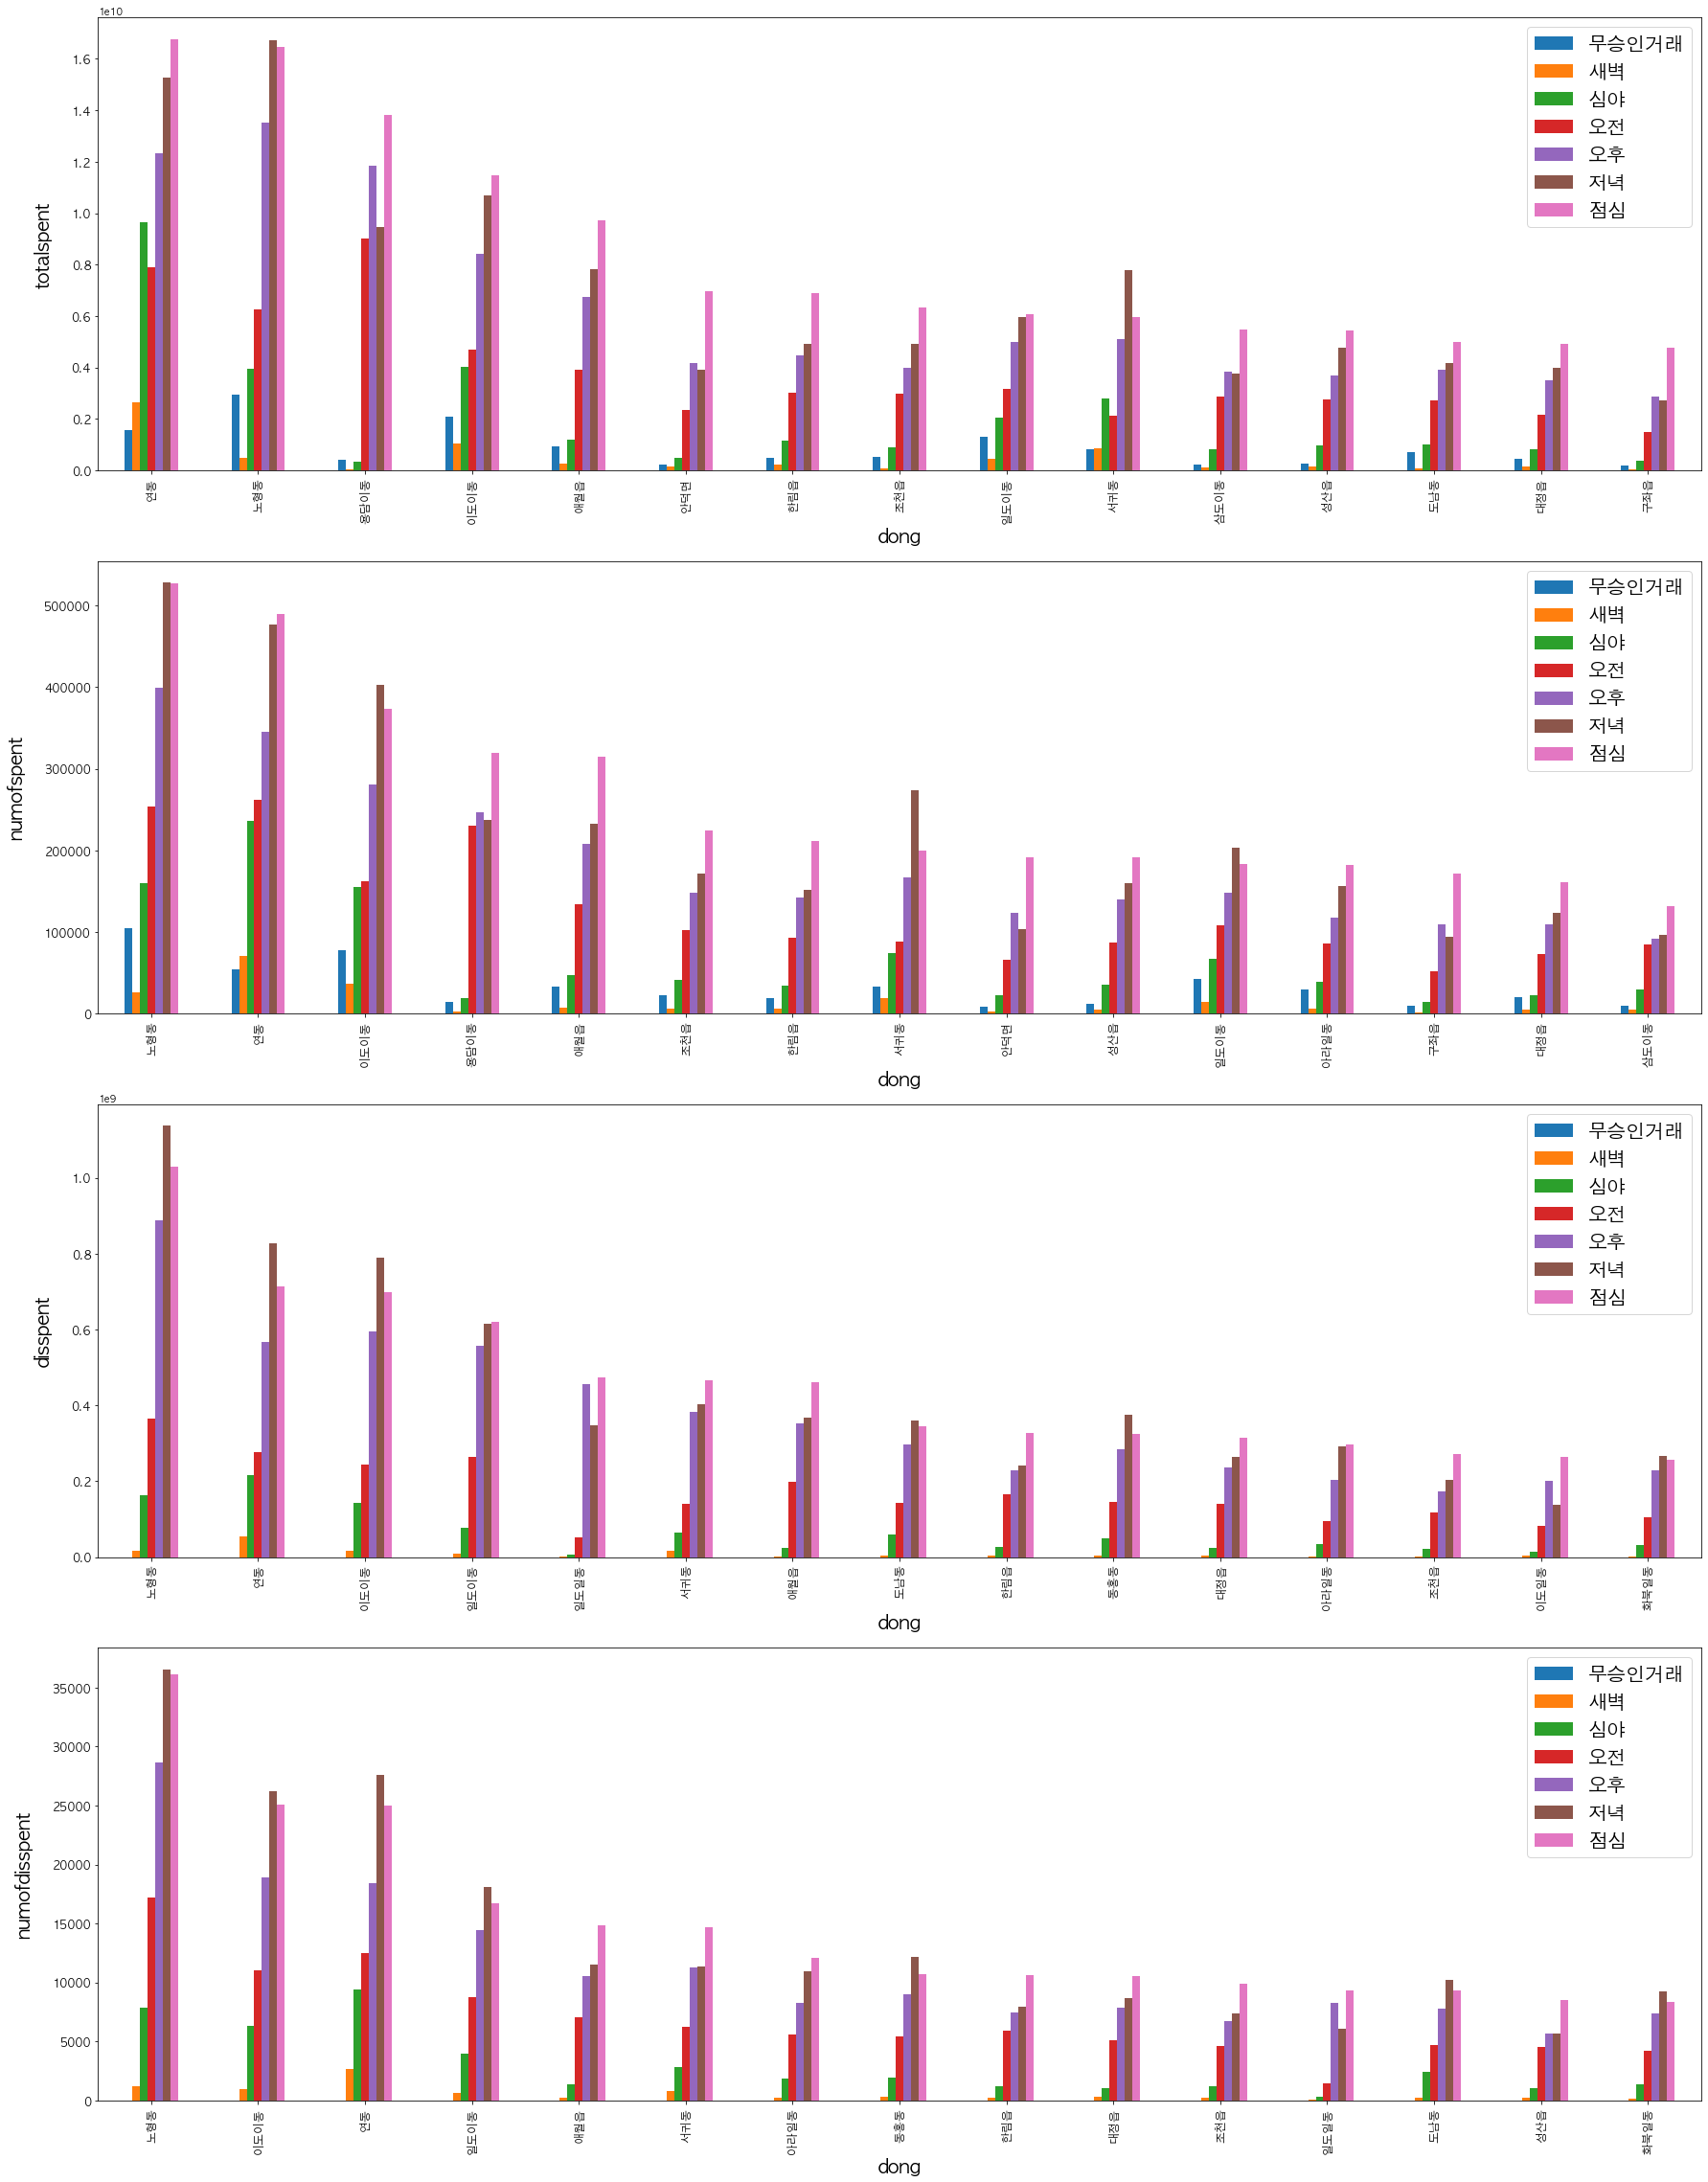

In [112]:
# 'dong' & 'time_cut' + spent
def vis2(x, y, z, w, agg) :
    figure, (ax1,ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
    figure.set_size_inches(30, 40)
    
    for i, j in zip(y, [ax1, ax3, ax2, ax4]) :
        df1 = jeju_all.pivot_table(values = i, index = x, columns = z, aggfunc = 'sum')
        
        df1.sort_values(by = w, ascending = False)[:15].plot(kind = 'bar', fontsize = 12, ax = j)
        j.set_xlabel(x, size = 20)
        j.set_ylabel(i, labelpad = 20, size = 20)
        j.legend(fontsize = 20)

vis2('dong', spent, 'time_cut', '점심', 'sum')

### 3.3.3 Resolving assumptions & questions
- see deeply all the assumptions & questions we mentioned above and conclude.

### Checkpoint 1. 월별 재난지원금 사용비율
- 사용비율체크 (전체, 월별, 업종별, 지역별, 업종규모별)
- 전체 by 파이차트
  - 전체 소비 중 재난지원금 사용비율은?
  - ~%이며, 전체 재난지원금 얼마 중 얼마가 사용되었다. 소진율은 ~%다.
- 월별 by 누적막대그래프 (비율)
  - 월별 소비 중 재난지원금 사용비율은?
  - 월별 ~%이며, 몇 월에 대부분이 소비되었다.
  - 재난지원금으로 인해 5월 소비가 많이 진작되었다. 6, 7, 8월은? (관광객 숫자 체크)

### 전체 중 재난지원금

In [113]:
totdis = 41200000000
jeju_all.disspent.sum() * 100 / totdis
100-(jeju_all.disspent.sum() * 100)

-3573365664600

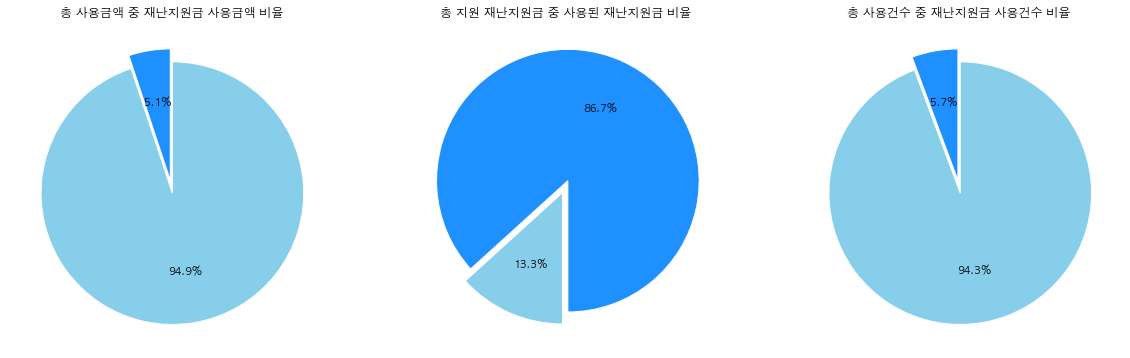

In [114]:
fig = plt.figure(figsize=[20, 10])
explode = [0.05, 0.05]
colors = ['dodgerblue', 'skyblue']
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 1}

title = "총 사용금액 중 재난지원금 사용금액 비율"
sizes = [jeju_all.disspent.mean()*100/jeju_all.totalspent.mean(), 100-(jeju_all.disspent.mean()*100/jeju_all.totalspent.mean())] 
ax1 = fig.add_subplot(1, 3, 1)
ax1 = plt.pie(sizes, autopct='%1.1f%%', startangle=90, explode = explode, colors = colors, wedgeprops = wedgeprops)
ax1 = plt.title(title)

totdis = 41200000000
title = "총 지원 재난지원금 중 사용된 재난지원금 비율"
sizes = [jeju_all.disspent.sum() * 100 / totdis, 100-(jeju_all.disspent.sum() * 100 / totdis)] 
ax2 = fig.add_subplot(1, 3, 2)
ax2 = plt.pie(sizes, autopct='%1.1f%%', startangle=270, explode = explode, colors = colors, wedgeprops = wedgeprops)
ax2 = plt.title(title)

title = "총 사용건수 중 재난지원금 사용건수 비율"
sizes = [jeju_all.numofdisspent.mean()*100/jeju_all.numofspent.mean(), 100-(jeju_all.numofdisspent.mean()*100/jeju_all.numofspent.mean())] 
ax3 = fig.add_subplot(1, 3, 3)
ax3 = plt.pie(sizes, autopct='%1.1f%%', startangle=90, explode = explode, colors = colors, wedgeprops = wedgeprops)
ax3 = plt.title(title)

plt.show()

### 월별 재난지원금

In [115]:
jeju_total = jeju_all.groupby('ym')['totalspent'].sum()
jeju_dis = jeju_all.groupby('ym')['disspent'].sum()
jeju_month = jeju_total/jeju_all.totalspent.sum()
jeju_p = jeju_dis/jeju_total

In [116]:
list(jeju_dis)[0]

24180094624

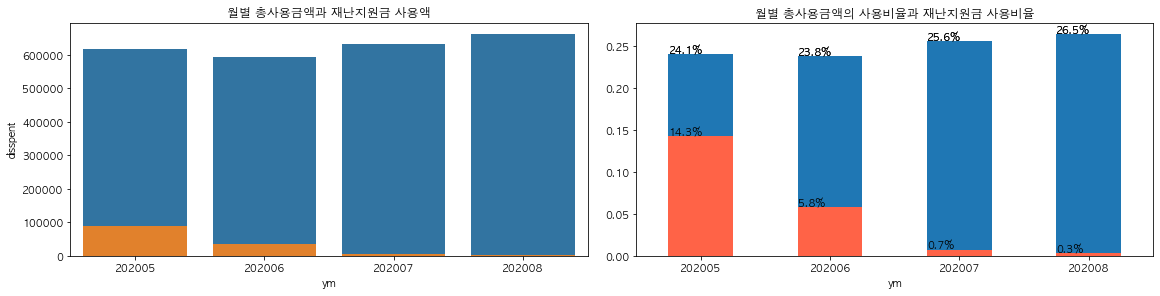

In [117]:
# 월별 총사용금액 - 총사용금액 대비 재난지원금 확인 
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
figure.set_size_inches(16,4)

sns.barplot(x='ym', y ='totalspent', data=jeju_all, ci = None, color='C0', ax=ax1)
sns.barplot(x='ym', y ='disspent', data=jeju_all, ci = None, color='C1', ax=ax1)
ax1.set_title('월별 총사용금액과 재난지원금 사용액')

# 총사용금액의 월별 사용비율 
# 재난지원금 월별 사용 비율
ax2 = jeju_month.plot.bar(x='ym', y='0', rot=0, color='C0')
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y))
ax2 = jeju_p.plot.bar(x='ym', y='0', rot=0, color = 'tomato')
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y)) 
ax2 = plt.title('월별 총사용금액의 사용비율과 재난지원금 사용비율')

Text(0.5, 1.0, '사용된 재난지원금 중 월별 사용된 재난지원금 비율')

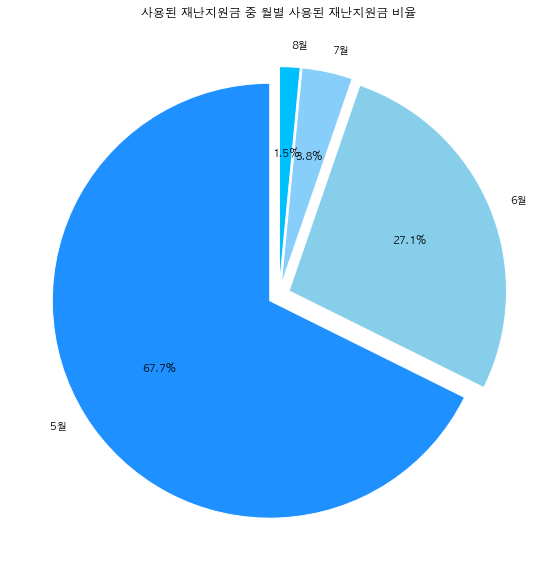

In [118]:
# 사용된 재난지원금 중 월별 사용된 재난지원금 비율
fig = plt.figure(figsize=[10, 10])

explode = [0.05, 0.05, 0.05, 0.05]
colors = ['dodgerblue', 'skyblue', 'lightskyblue', 'deepskyblue']
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 1}
title = "사용된 재난지원금 중 월별 사용된 재난지원금 비율"
sizes = [list(jeju_dis)[0] * 100 / jeju_dis.sum(), list(jeju_dis)[1] * 100 / jeju_dis.sum(), list(jeju_dis)[2] * 100 / jeju_dis.sum(), list(jeju_dis)[3] * 100 / jeju_dis.sum()] 
plt.pie(sizes, labels = ['5월', '6월', '7월', '8월'], autopct='%1.1f%%', startangle=90, explode = explode, colors = colors, wedgeprops = wedgeprops)
plt.title(title)   

### 재난지원금으로 5월 소비가 진작된게 맞는가?
- 5-8월 제주도 내 인구, 관광객 수 체크
- 5월에 관광객이 적고, 7-8월에 관광객이 늘어났고, 5-8월 전체 사용금액이 비슷하다면
- 인원이 가장 적었던 시기에 높은 전체 사용금액을 보여주므로 재난지원금 효과가 있었다고 볼 수 있음

### 2020년 제주도 내 인구 현황
- KOSIS에 따르면 약 67만명으로 확인
- 읍면동별 인구수도 체크
- 출처 : https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B04005N&vw_cd=MT_ZTITLE&list_id=A_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [119]:
os.chdir("/Users/harryjeong/DA/Project/dacon_jeju")

In [120]:
df_people = pd.read_csv('data_add/인구통계.csv', encoding='euc-kr')

df_people = df_people.iloc[2:, [0, 2, 3, 4, 5]].reset_index().iloc[:, 1:]
df_people.rename(columns = {'행정구역(동읍면)별':'dong'}, inplace = True)
jejusi = ['제주시'] * list(df_people[df_people.dong == '서귀포시'].index.values)[0]
seogusi = ['서귀포시'] * (len(df_people.dong) - list(df_people[df_people.dong == '서귀포시'].index.values)[0])
si = jejusi + seogusi
df_people['si'] = si
df_people = df_people[df_people.dong != '서귀포시'][df_people.dong != '제주시']
df_people.head()

df_people1 = df_people.set_index(['si', 'dong'], drop = True)
df_people1 = df_people1.astype('int')

In [121]:
df_people1.sum(axis = 0)

2020. 05    670793
2020. 06    671316
2020. 07    671913
2020. 08    672524
dtype: int64

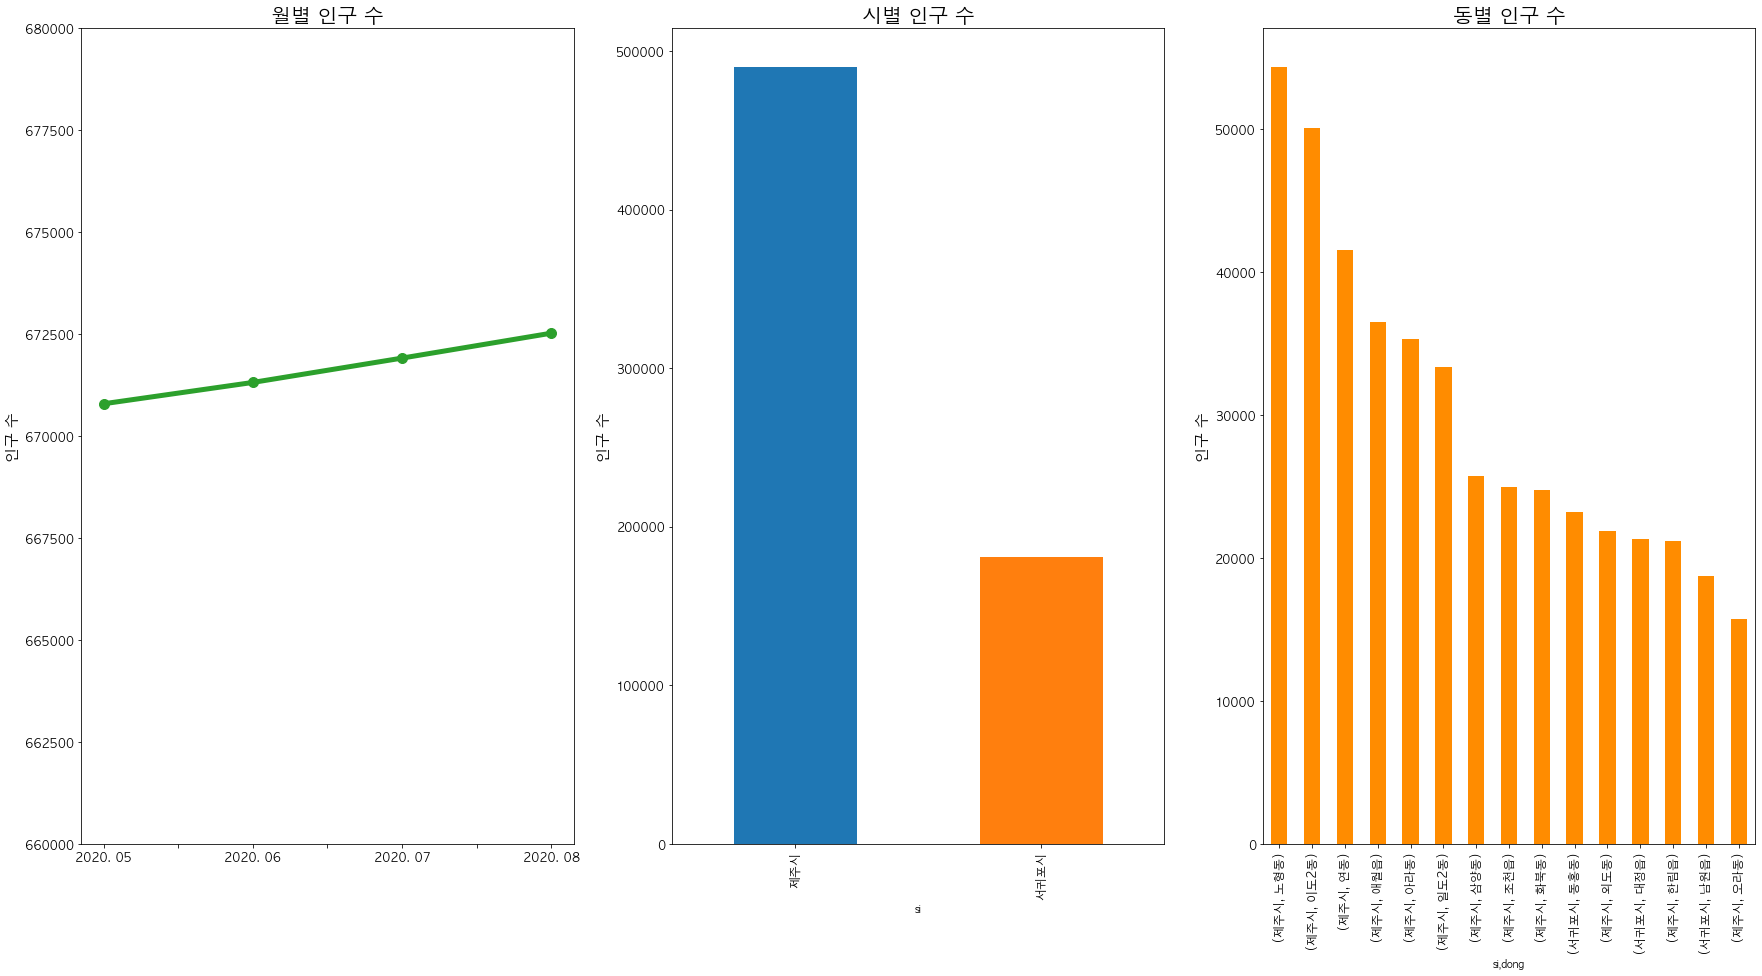

In [122]:
fig = plt.figure(figsize=[30, 15])

ax1 = fig.add_subplot(1, 3, 1)
ax1 = df_people1.sum(axis = 0).plot(marker = 'o', markersize = '10.0', fontsize = 12, color = 'C2', ylim = [660000, 680000], linewidth = 5.0)
ax1 = plt.title('월별 인구 수', fontsize = 20)
ax1 = plt.ylabel('인구 수', fontsize = 15)

ax2 = fig.add_subplot(1, 3, 2)
ax2 = df_people1['2020. 05'].sum(level = 0).plot.bar(fontsize = 12, color = ['C0', 'C1'])
ax2 = plt.title('시별 인구 수', fontsize = 20)
ax2 = plt.ylabel('인구 수', fontsize = 15)

# 인구 수 상위 15개 동
ax3 = fig.add_subplot(1, 3, 3)
ax3 = df_people1['2020. 05'].sort_values(ascending = False)[:15].plot.bar(fontsize = 12, color = 'darkorange')
ax3 = plt.title('동별 인구 수', fontsize = 20)
ax3 = plt.ylabel('인구 수', fontsize = 15)

In [123]:
display(df_people1.sum(axis = 0),
        df_people1['2020. 05'].sum(level = 0),
        df_people1['2020. 05'].sort_values(ascending = False)[:15])

2020. 05    670793
2020. 06    671316
2020. 07    671913
2020. 08    672524
dtype: int64

si
제주시     489734
서귀포시    181059
Name: 2020. 05, dtype: int64

si    dong
제주시   노형동     54309
      이도2동    50074
      연동      41528
      애월읍     36516
      아라동     35281
      일도2동    33362
      삼양동     25743
      조천읍     24976
      화북동     24709
서귀포시  동홍동     23185
제주시   외도동     21866
서귀포시  대정읍     21316
제주시   한림읍     21202
서귀포시  남원읍     18758
제주시   오라동     15703
Name: 2020. 05, dtype: int64

### 2020년 제주도 내 관광객 현황
- 입국객수 2020년 5월 약 79만명, 6월 약 89만명, 7월 약 100만명, 8월 약 110만명
- 출처 : https://www.airport.co.kr/www/cms/frFlightStatsCon/timeSeriesStats.do?MENU_ID=1250#none

In [124]:
from pandas import DataFrame
from pandas import Series
d1 = {'tour':[792703, 891945, 1022529, 1142161], 'month':['202005', '202006', '202007', '202008']}
df_tour = DataFrame(d1)
df_tour['증가율'] = df_tour['tour'].pct_change() * 100

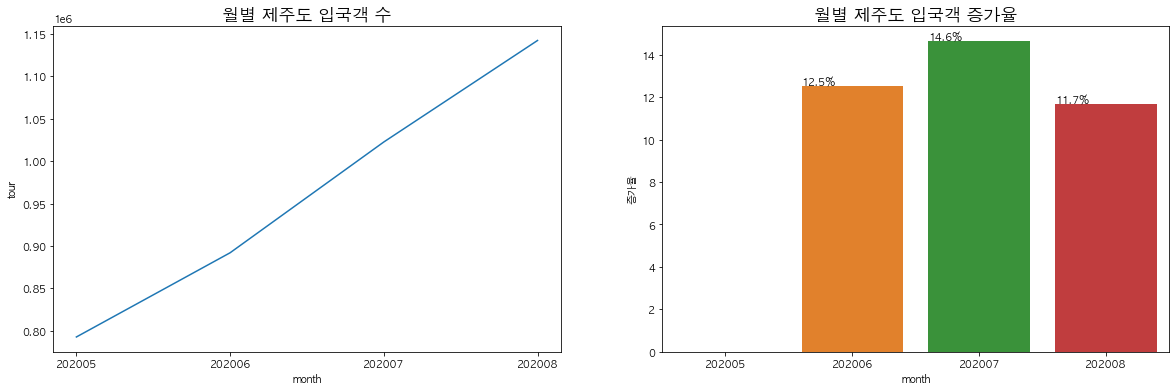

In [125]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.lineplot(x = 'month', y = 'tour', data = df_tour, ax = ax[0])
ax[0].set_title('월별 제주도 입국객 수', fontsize=17)
sns.barplot(x = 'month', y = '증가율', data = df_tour, ax = ax[1])
ax[1].set_title('월별 제주도 입국객 증가율', fontsize=17)

for p in ax[1].patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax[1].annotate(percentage, (x, y))

In [126]:
df_tour

,tour,month,증가율
0,792703,202005,NaN
1,891945,202006,12.519443
2,1022529,202007,14.640365
3,1142161,202008,11.699619


### 월별 업종별 총사용금액과 재난지원금 사용금액 비교

Text(0.5, 1.0, '8월 업종별 총사용금액과 재난지원금 사용금액')

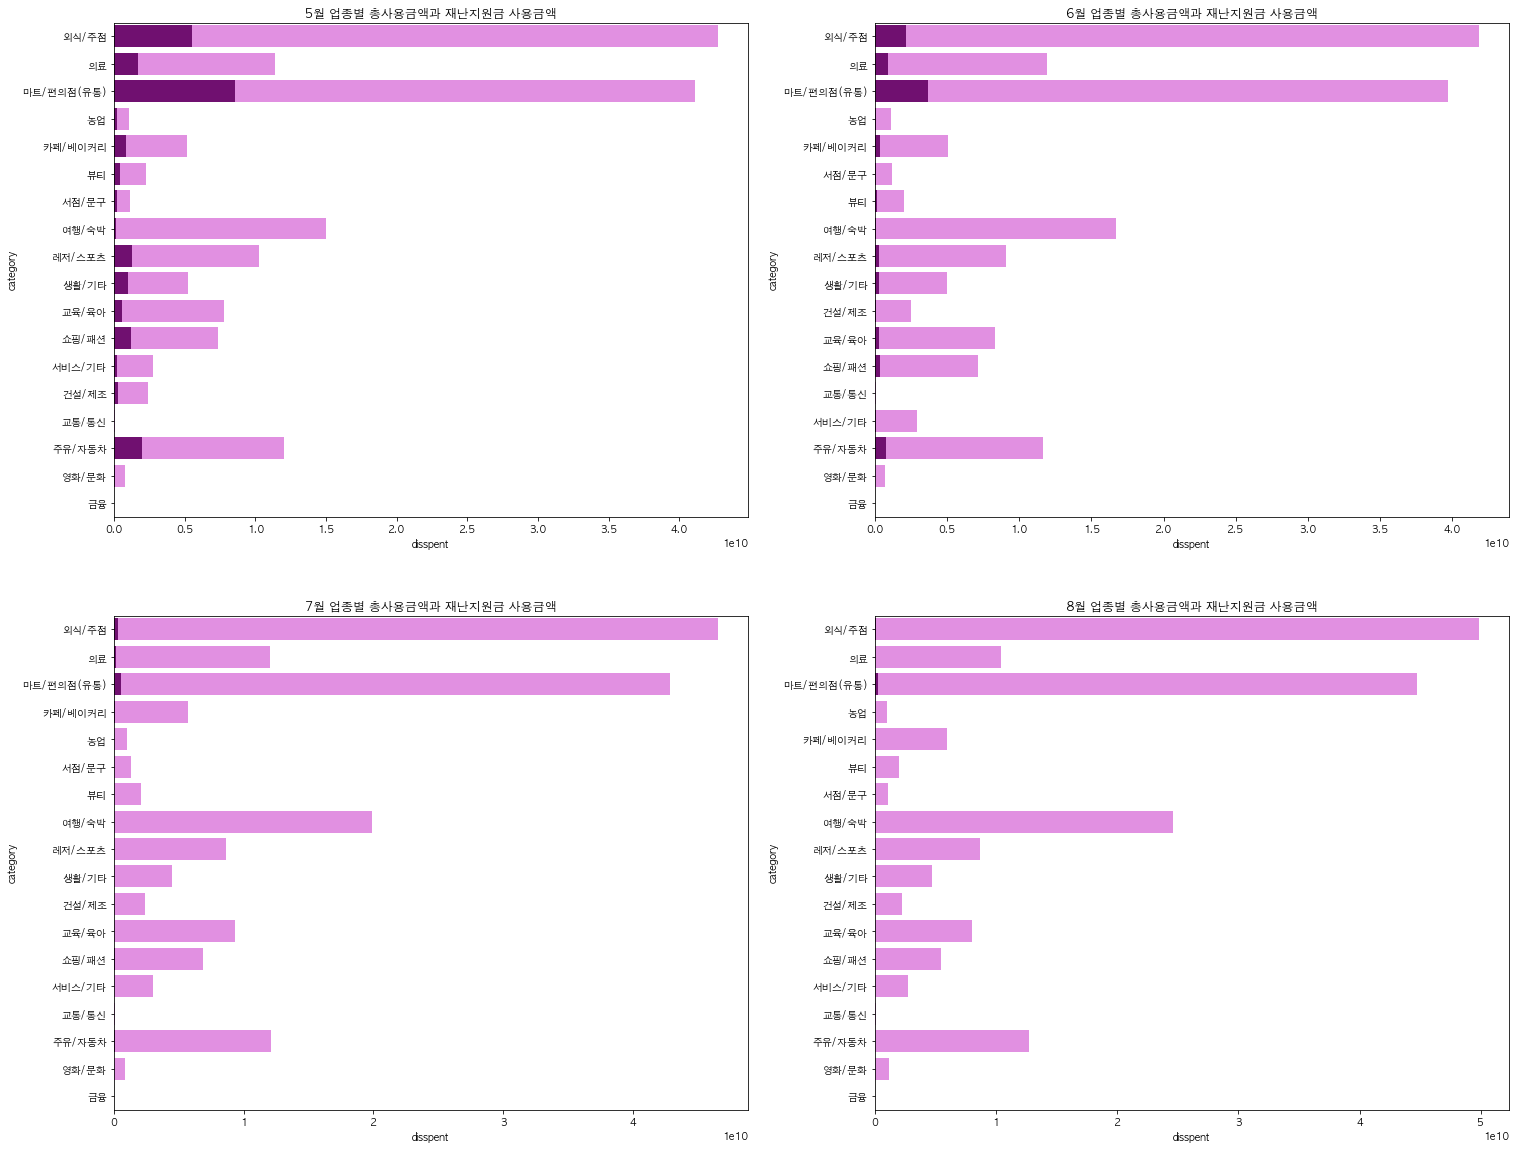

In [127]:
fig = plt.figure(figsize=(25, 20))

# 202005
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.barplot(x = 'totalspent', y = 'category', ci = None, color = 'violet', estimator = sum, data = jeju_all[jeju_all['ym'] == 202005])
ax1 = sns.barplot(x = 'disspent', y = 'category', ci = None, color = 'purple', estimator = sum, data = jeju_all[jeju_all['ym'] == 202005])
ax1.set_title('5월 업종별 총사용금액과 재난지원금 사용금액')

# 202006
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.barplot(x = 'totalspent', y = 'category', ci = None, color = 'violet', estimator = sum, data = jeju_all[jeju_all['ym'] == 202006])
ax2 = sns.barplot(x = 'disspent', y = 'category', ci = None, color = 'purple', estimator = sum, data = jeju_all[jeju_all['ym'] == 202006])
ax2.set_title('6월 업종별 총사용금액과 재난지원금 사용금액')

# 202007
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.barplot(x = 'totalspent', y = 'category', ci = None, color = 'violet', estimator = sum, data = jeju_all[jeju_all['ym'] == 202007])
ax3 = sns.barplot(x = 'disspent', y = 'category', ci = None, color = 'purple', estimator = sum, data = jeju_all[jeju_all['ym'] == 202007])
ax3.set_title('7월 업종별 총사용금액과 재난지원금 사용금액')

# 202008
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.barplot(x = 'totalspent', y = 'category', ci = None, color = 'violet', estimator = sum, data = jeju_all[jeju_all['ym'] == 202008])
ax4 = sns.barplot(x = 'disspent', y = 'category', ci = None, color = 'purple', estimator = sum, data = jeju_all[jeju_all['ym'] == 202008])
ax4.set_title('8월 업종별 총사용금액과 재난지원금 사용금액')

### 외식/주점, 마트/편의점(유통), 의료, 레저/스포츠, 쇼핑/패션의 세부업종 살펴보기

Text(0.5, 1.0, '5월 쇼핑/패션 총사용금액과 재난지원금 사용금액')

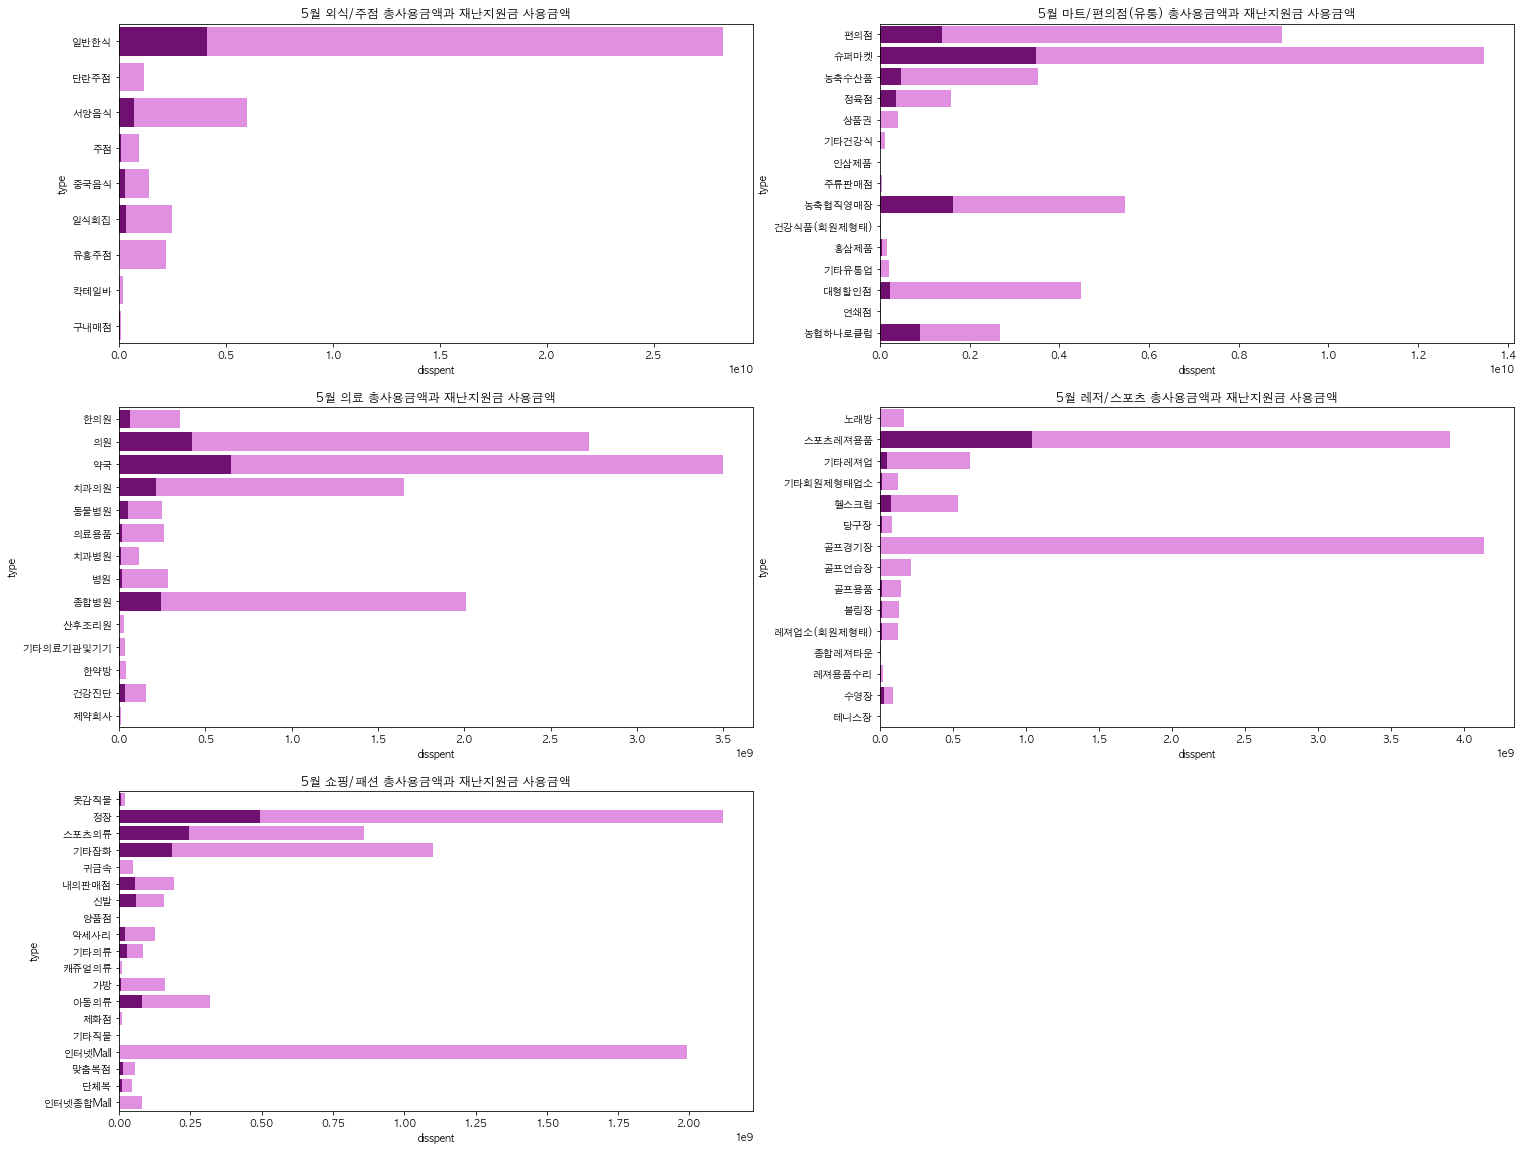

In [128]:
fig = plt.figure(figsize=(25, 20))

# 외식/주점
ax1 = fig.add_subplot(3, 2, 1)
ax1 = sns.barplot(x = 'totalspent', y = 'type', ci = None, color = 'violet', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '외식/주점')])
ax1 = sns.barplot(x = 'disspent', y = 'type', ci = None, color = 'purple', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '외식/주점')])
ax1.set_title('5월 외식/주점 총사용금액과 재난지원금 사용금액')

# 마트/편의점(유통)
ax2 = fig.add_subplot(3, 2, 2)
ax2 = sns.barplot(x = 'totalspent', y = 'type', ci = None, color = 'violet', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '마트/편의점(유통)')])
ax2 = sns.barplot(x = 'disspent', y = 'type', ci = None, color = 'purple', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '마트/편의점(유통)')])
ax2.set_title('5월 마트/편의점(유통) 총사용금액과 재난지원금 사용금액')

# 의료
ax3 = fig.add_subplot(3, 2, 3)
ax3 = sns.barplot(x = 'totalspent', y = 'type', ci = None, color = 'violet', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '의료')])
ax3 = sns.barplot(x = 'disspent', y = 'type', ci = None, color = 'purple', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '의료')])
ax3.set_title('5월 의료 총사용금액과 재난지원금 사용금액')

# 레저/스포츠
ax4 = fig.add_subplot(3, 2, 4)
ax4 = sns.barplot(x = 'totalspent', y = 'type', ci = None, color = 'violet', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '레저/스포츠')])
ax4 = sns.barplot(x = 'disspent', y = 'type', ci = None, color = 'purple', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '레저/스포츠')])
ax4.set_title('5월 레저/스포츠 총사용금액과 재난지원금 사용금액')

# 쇼핑/패션
ax5 = fig.add_subplot(3, 2, 5)
ax5 = sns.barplot(x = 'totalspent', y = 'type', ci = None, color = 'violet', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '쇼핑/패션')])
ax5 = sns.barplot(x = 'disspent', y = 'type', ci = None, color = 'purple', estimator = sum, data = jeju_all[(jeju_all['ym'] == 202005) & (jeju_all['category'] == '쇼핑/패션')])
ax5.set_title('5월 쇼핑/패션 총사용금액과 재난지원금 사용금액')

### 3. 지역별 재난지원금 사용비율

### 재난지원금 사용순위, 동별 인구 순위

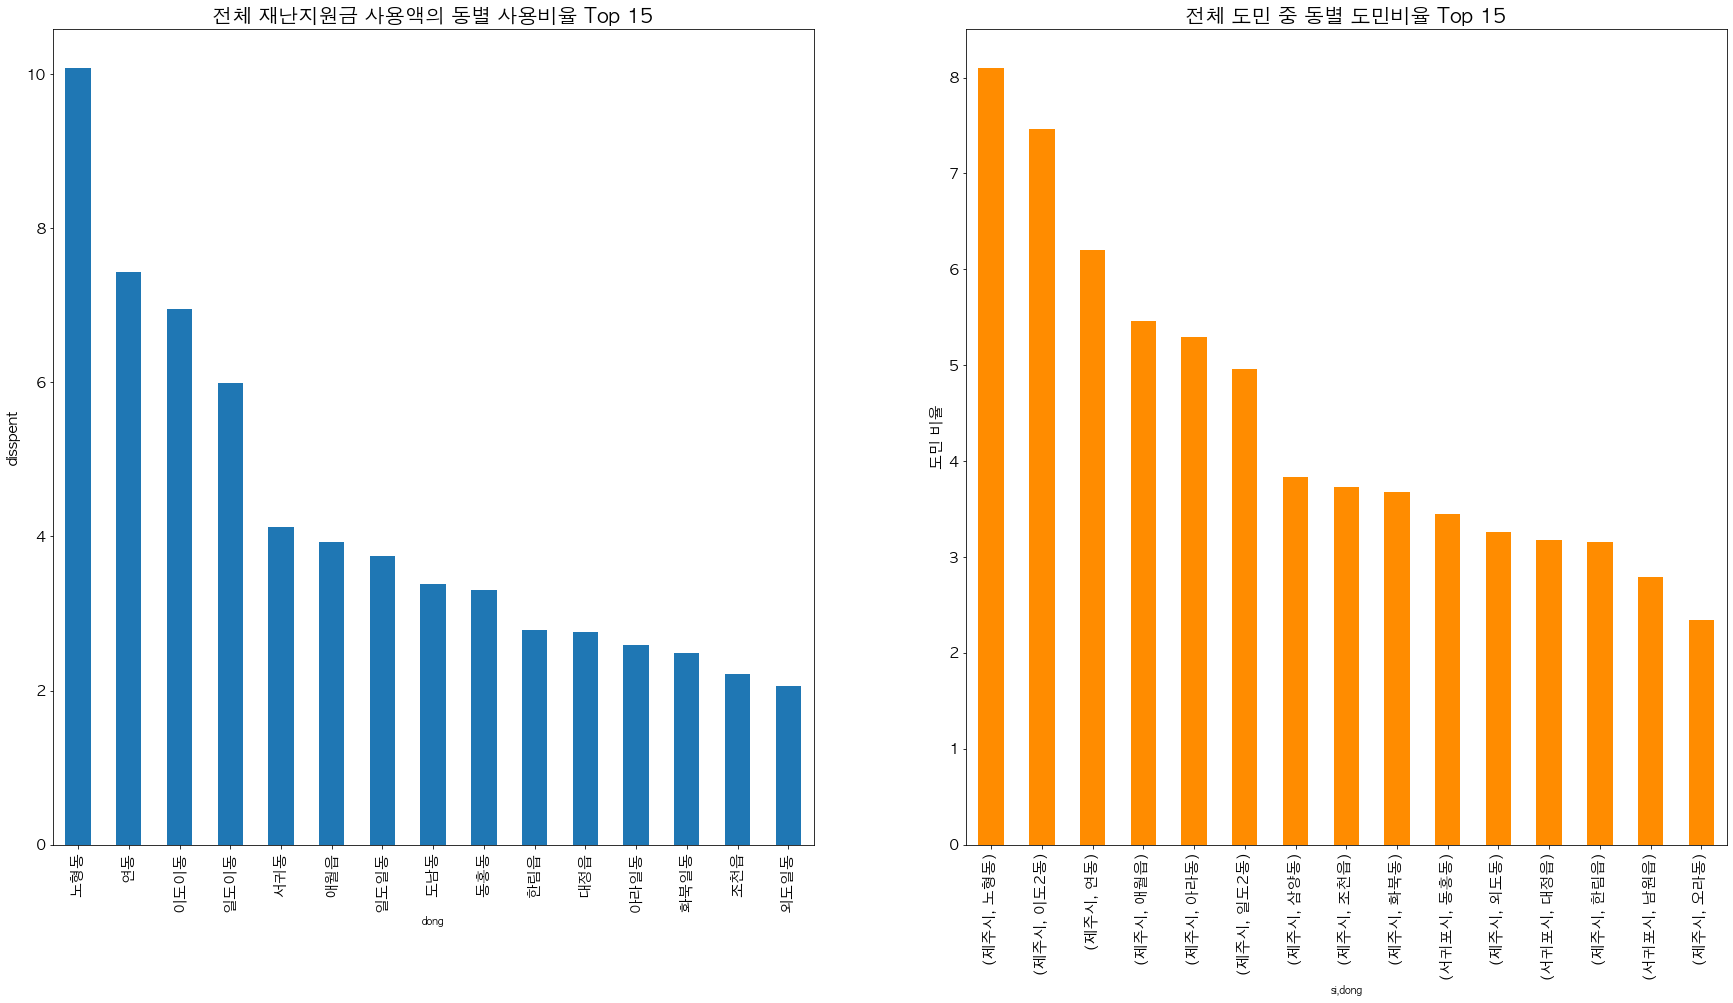

In [129]:
fig = plt.figure(figsize = (30, 15))

dfy = jeju_all.groupby(['dong'])['disspent'].sum().sort_values(ascending = False)[:15] * 100 / sum(jeju_all.disspent)
ax1 = fig.add_subplot(1, 2, 1)
ax1 = dfy.plot(kind = 'bar', fontsize = 15)
ax1 = plt.title('전체 재난지원금 사용액의 동별 사용비율 Top 15', fontsize = 20)
ax1 = plt.ylabel('disspent', fontsize = 15)

dfx = df_people1.mean(axis = 1) * 100 / df_people1.mean(axis = 1).sum()
ax2 = fig.add_subplot(1, 2, 2)
ax2 = dfx.sort_values(ascending = False)[:15].plot.bar(fontsize = 15, color = 'darkorange')
ax2 = plt.title('전체 도민 중 동별 도민비율 Top 15', fontsize = 20)
ax2 = plt.ylabel('도민 비율', fontsize = 15)

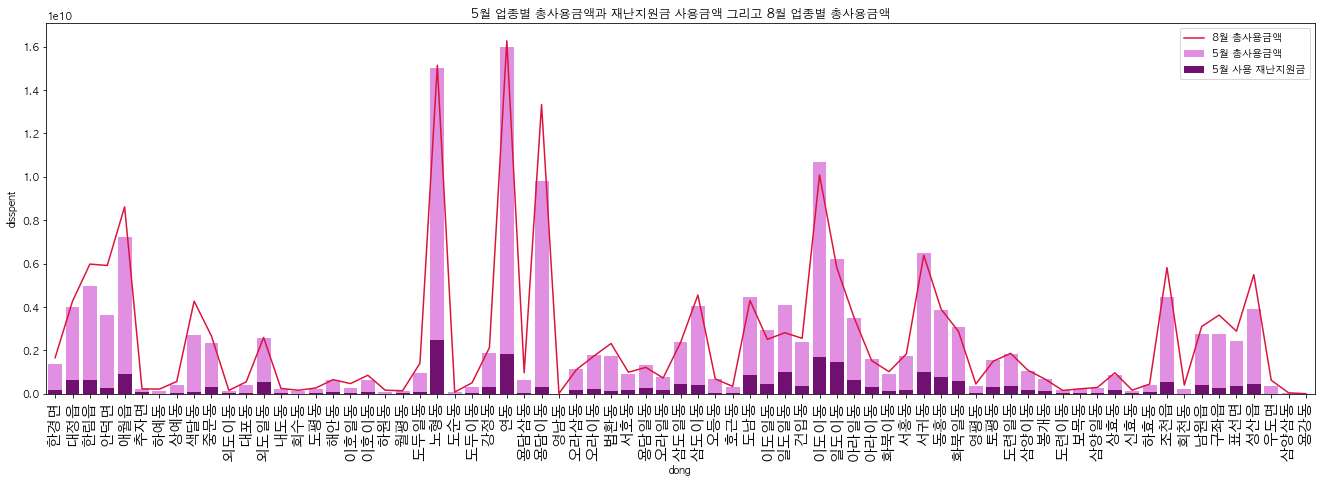

In [130]:
fig = plt.figure(figsize=(50, 15))

ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.lineplot(x = 'dong', y = 'totalspent', ci = None, label = '8월 총사용금액', color = 'crimson', estimator = sum, data = jeju_all[jeju_all['ym'] == 202008])
ax1 = sns.barplot(x = 'dong', y = 'totalspent', ci = None, label = '5월 총사용금액', color = 'violet', estimator = sum, data = jeju_all[jeju_all['ym'] == 202005])
ax1 = sns.barplot(x = 'dong', y = 'disspent', ci = None, label = '5월 사용 재난지원금', color = 'purple', estimator = sum, data = jeju_all[jeju_all['ym'] == 202005])
ax1.set_title('5월 업종별 총사용금액과 재난지원금 사용금액 그리고 8월 업종별 총사용금액')
ax1 = plt.xticks(rotation = 90, fontsize = 15)
ax1 = plt.legend()

### 업종규모별 재난지원금 사용비율

In [131]:
# - Standard plotly imports
import chart_studio
import cufflinks as cf
cf.go_offline(connected=True)

In [270]:
jeju_all.groupby(['franclass'])[['totalspent', 'disspent']].sum()

,totalspent,disspent
franclass,,
영세,156714863738,8481179470
일반,301279415845,14423786893
중소,69361984579,3361499475
중소1,87683013869,4803903973
중소2,85386732430,4663286836


In [269]:
layout = {
    'font' : {
        'size' : 20
    }
}
jeju_all.groupby(['franclass'])[['totalspent', 'disspent']].sum().iplot(kind = 'bar',
                                                                        title = "업종규모별 총사용금액 및 재난지원금 사용금액",
                                                                        xTitle = '업종규모'
                                                                        )                                                                        

In [133]:
import plotly.express as px
fran_dis_rate = jeju_all.groupby(['franclass'])[['disspent']].sum() * 100 / sum(jeju_all.disspent)

fig = px.pie(fran_dis_rate, values = 'disspent', names=fran_dis_rate.index.values,
             title='업종규모별 전체 재난지원금 중 재난지원금 사용비율')
fig.show()

### 업종규모별 전체 사용금액 중 재난지원금 사용비율

In [134]:
fran_rate = jeju_all.groupby(['franclass'])[['totalspent', 'disspent']].sum()
fran_rate['dis_rate_tot'] = fran_rate.disspent * 100 / fran_rate.totalspent
fran_rate

,totalspent,disspent,dis_rate_tot
franclass,,,
영세,156714863738,8481179470,5.411854
일반,301279415845,14423786893,4.787512
중소,69361984579,3361499475,4.846314
중소1,87683013869,4803903973,5.478717
중소2,85386732430,4663286836,5.461372


In [135]:
fig = px.bar(fran_rate, x = fran_rate.index.values, y = 'dis_rate_tot',
             color = fran_rate.index.values,
             title='업종규모별 전체 사용금액 중 재난지원금 사용비율')
fig.show()

### 월별 업종규모별 전체 사용금액

In [271]:
df = jeju_all.groupby(['ym', 'franclass'])[['totalspent', 'disspent']].sum().reset_index()
df['ym'] = df.ym.astype('str')
df

,ym,franclass,totalspent,disspent
0,202005,영세,38075428110,5884366379
1,202005,일반,72954232828,9552976062
2,202005,중소,16352174700,2296089334
3,202005,중소1,21105202586,3285220071
4,202005,중소2,20200673975,3161442778
5,202006,영세,36363934282,2180389619
6,202006,일반,74669683352,4108500921
7,202006,중소,15879659149,886040496
8,202006,중소1,20404681265,1270086023
9,202006,중소2,19660544216,1221331965


In [272]:
fig = px.bar(df, x = 'franclass', y = 'totalspent', color = 'ym', barmode = 'group',
             title='월별 업종규모별 전체 사용금액')
fig.show()

In [273]:
fig = px.bar(df, x = 'franclass', y = 'disspent', color = 'ym', barmode = 'group',
             title='월별 업종규모별 재난지원금 사용액')
fig.show()

### 업종규모별 업종-세부업종별 재난지원금 사용액

In [321]:
df1 = jeju_all.pivot_table(values = 'disspent', index = 'franclass', columns = ['category', 'type'], aggfunc = 'sum').fillna(0).unstack().reset_index()
df1.columns.values[3] = 'disspent'
df1.head()

,category,type,franclass,disspent
0,건설/제조,건축요업품,영세,2586490.0
1,건설/제조,건축요업품,일반,12448935.0
2,건설/제조,건축요업품,중소,1814330.0
3,건설/제조,건축요업품,중소1,10044185.0
4,건설/제조,건축요업품,중소2,4417504.0


In [323]:
fig = px.bar(df1[df1.category == '외식/주점'], x = 'type', y = 'disspent', color = 'franclass', barmode = 'group',
             title='업종규모별 외식/주점-업종 세부업종 재난지원금 사용액')
fig.show()

In [327]:
fig = px.bar(df1[df1.category == '마트/편의점(유통)'], x = 'type', y = 'disspent', color = 'franclass', barmode = 'group',
             title='업종규모별 마트/편의점(유통)-업종 세부업종 재난지원금 사용액')
fig.show()

In [328]:
fig = px.bar(df1[df1.category == '의료'], x = 'type', y = 'disspent', color = 'franclass', barmode = 'group',
             title='업종규모별 의료-업종 세부업종 재난지원금 사용액')
fig.show()

In [329]:
fig = px.bar(df1[df1.category == '주유/자동차'], x = 'type', y = 'disspent', color = 'franclass', barmode = 'group',
             title='업종규모별 주유/자동차-업종 세부업종 재난지원금 사용액')
fig.show()

### 업종규모별 업종 및 세부업종

In [219]:
fran_category = jeju_all.pivot_table(values = ['type'], index = ['category'], columns = ['franclass'], aggfunc = 'count').type.fillna(0)
fran_type = jeju_all.pivot_table(values = ['category'], index = ['type'], columns = ['franclass'], aggfunc = 'count').category.fillna(0)

In [220]:
fran_category['영세_rate'] = fran_category.영세 * 100 / sum(fran_category.영세)
fran_category['일반_rate'] = fran_category.일반 * 100 / sum(fran_category.일반)
fran_category['중소_rate'] = fran_category.중소 * 100 / sum(fran_category.중소)
fran_category['중소1_rate'] = fran_category.중소1 * 100 / sum(fran_category.중소1)
fran_category['중소2_rate'] = fran_category.중소2 * 100 / sum(fran_category.중소2)

fran_type['영세_rate'] = fran_type.영세 * 100 / sum(fran_type.영세)
fran_type['일반_rate'] = fran_type.일반 * 100 / sum(fran_type.일반)
fran_type['중소_rate'] = fran_type.중소 * 100 / sum(fran_type.중소)
fran_type['중소1_rate'] = fran_type.중소1 * 100 / sum(fran_type.중소1)
fran_type['중소2_rate'] = fran_type.중소2 * 100 / sum(fran_type.중소2)

In [229]:
fran_cat_rate = fran_category.iloc[:, 5:]
fran_cat_rate = fran_cat_rate.unstack().reset_index()
fran_cat_rate

,franclass,category,0
0,영세_rate,건설/제조,1.095979
1,영세_rate,교육/육아,4.511549
2,영세_rate,교통/통신,0.162825
3,영세_rate,금융,0.000000
4,영세_rate,농업,0.155630
...,...,...,...
85,중소2_rate,영화/문화,1.377376
86,중소2_rate,외식/주점,20.405199
87,중소2_rate,의료,10.245173
88,중소2_rate,주유/자동차,11.213093


In [244]:
fig = px.bar(fran_cat_rate, x = 'category', y = [0], color = 'franclass', facet_col = 'franclass',
              title='업종규모별 업종 비율')

fig.show()

In [263]:
fran_type_rate = fran_type.iloc[:, 5:]
fran_type_rate = fran_type_rate.unstack().reset_index()
fran_type_rate = fran_type_rate.sort_values(by = ['franclass', 0], ascending = False)

# Top 10개만 선정
fran1 = fran_type_rate[fran_type_rate.franclass == '영세_rate'][:10]
fran2 = fran_type_rate[fran_type_rate.franclass == '일반_rate'][:10]
fran3 = fran_type_rate[fran_type_rate.franclass == '중소_rate'][:10]
fran4 = fran_type_rate[fran_type_rate.franclass == '중소1_rate'][:10]
fran5 = fran_type_rate[fran_type_rate.franclass == '중소2_rate'][:10]
fran_type_top10 = fran1.append(fran2, ignore_index = True).append(fran3, ignore_index = True).append(fran4, ignore_index = True).append(fran5, ignore_index = True)
fran_type_top10.head()

,franclass,type,0
0,영세_rate,일반한식,27.341136
1,영세_rate,서양음식,10.659793
2,영세_rate,미용원,4.708941
3,영세_rate,스넥,3.832095
4,영세_rate,편의점,3.537727


In [330]:
fig = px.bar(fran_type_top10, x = 'type', y = [0], color = 'franclass', facet_col = 'franclass',
              title='업종규모별 세부업종 비율')
fig.show()

### 월별 사비 사용금액의 추이 by tot_dis, num_tot_dis

In [331]:
jeju_all.head()

,objectid,field1,ym,sigungu,franclass,type,time,totalspent,disspent,numofspent,...,point_x,point_y,lon,lat,lon_lat,dong,category,time_cut,tot_dis,num_tot_dis
0,1,1,202005,제주시,영세,일반한식,00,363000,66500,10,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,심야,296500,8
1,4904,4904,202005,제주시,영세,일반한식,01,86500,0,3,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,심야,86500,3
2,8569,8569,202005,제주시,영세,일반한식,02,208000,0,5,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,새벽,208000,5
3,11270,11270,202005,제주시,영세,일반한식,03,18000,0,1,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,새벽,18000,1
4,19122,19122,202005,제주시,중소,한의원,07,4800,0,2,...,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,의료,오전,4800,2


In [339]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

In [344]:
#Define coordinates of where we want to center our map
boulder_coords = [40.015, -105.2705]

#Create the map
my_map = folium.Map(location = boulder_coords, zoom_start = 13)

#Display the map
my_map

In [345]:
#Define the coordinates we want our markers to be at
CU_Boulder_coords = [40.007153, -105.266930]
East_Campus_coords = [40.013501, -105.251889]
SEEC_coords = [40.009837, -105.241905]

#Add markers to the map
folium.Marker(CU_Boulder_coords, popup = 'CU Boulder').add_to(my_map)
folium.Marker(East_Campus_coords, popup = 'East Campus').add_to(my_map)
folium.Marker(SEEC_coords, popup = 'SEEC Building').add_to(my_map)

#Display the map
my_map

In [347]:
# Adding a tileset to our map
map_with_tiles = folium.Map(location = boulder_coords, tiles = 'Stamen Toner')
map_with_tiles

In [335]:
############# 지역별 업종 규모 분포 ##############

df_js2 = jeju_all[jeju_all['franclass']=='중소2'] #중소2에 대해 추출 
df_js2 = df_js2[['sigungu','franclass','type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_js2.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_js2 #중소2 업종 리스트 

df_js1 = jeju_all[jeju_all['franclass']=='중소1'] #중소1에 대해 추출 
df_js1 = df_js1[['sigungu','franclass','type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_js1.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_js1 #중소1 업종 리스트 

df_js = jeju_all[jeju_all['franclass']=='중소'] #중소에 대해 추출 
df_js = df_js[['sigungu','franclass','type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_js.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_js #중소 업종 리스트 

df_gn = jeju_all[jeju_all['franclass']=='일반'] #일반에 대해 추출 
df_gn = df_gn[['sigungu','franclass','type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_gn.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_gn #일반 업종 리스트 

df_ys = jeju_all[jeju_all['franclass']=='영세'] #영세에 대해 추출 
df_ys = df_ys[['sigungu','franclass','type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_ys.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_ys #영세 업종 리스트 

,sigungu,franclass,type,lon,lat,lon_lat
0,제주시,영세,일반한식,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
5,제주시,영세,의원,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
50,제주시,영세,한의원,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
94,제주시,영세,단란주점,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875
99,제주시,영세,일반한식,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875
...,...,...,...,...,...,...
1119424,서귀포시,영세,기타숙박업,126.83882456997848,33.37198974202468,126.83882456997848_33.37198974202468
1119425,제주시,영세,기타교육,126.29371775568167,33.44278262819118,126.29371775568167_33.44278262819118
1119426,제주시,영세,기타교육,126.44677192780091,33.483559882610706,126.44677192780091_33.483559882610706
1119427,제주시,영세,농축수산품,126.5292452740336,33.473746251556754,126.5292452740336_33.473746251556754


In [337]:
#############folium을 통한 표현############ 
#용량문제로 시각화 생략#
import pandas as pd 
import folium
from folium.plugins import MarkerCluster, MiniMap

map_jeju = folium.Map((33.38773221915759, 126.54124720118492), zoom_start= 13)
mc = MarkerCluster()

minimap = MiniMap()
map_jeju.add_child(minimap)

map_jeju.add_child(mc)


map = folium.Map((33.38773221915759, 126.54124720118492), zoom_start= 10)

ModuleNotFoundError: No module named 'folium'

In [ ]:
# 중소2 서클 추가 
for i in range(len(df_js2['franclass'])):
    folium.Circle(list(df_js2.iloc[i][['lat','lon']]), radius=1, color = '#e41a1c',fill_color = '#e41a1c').add_to(map)
    
# 중소1 서클 추가 
for i in range(len(df_js1['franclass'])):
    folium.Circle(list(df_js1.iloc[i][['lat','lon']]), radius=1, color = '#377eb8',fill_color = '#d7b5d8').add_to(map)   
    
map

In [ ]:
df56 = mon5.merge(dat6[keyvar+spent],on=keyvar,suffixes=['_5','_6'],how='inner')
df78 = mon7[keyvar+spent].merge(mon8[keyvar+spent],on=keyvar,suffixes=['_7','_8'],how='inner')

df = df56.merge(df78,on=keyvar,how='inner')
df = df.drop('sido',axis=1)

del df56, df78

df.head()

### 재난지원금 총사용금액 기준

In [ ]:
var1=[]
var2=[]
var3=[]
var4=[]
for i in range(5,9):
    var1.append("_".join(["disspent",str(i)]))
    var2.append("_".join(["totalspent",str(i)]))
    var3.append("_".join(["numofdisspent",str(i)]))
    var4.append("_".join(["numofspent",str(i)]))

In [ ]:
df1 = tmp.pivot_table(index=['type','franclass'],values=var1+var2+var3+var4,aggfunc='sum')
df1

In [ ]:
df_month = df1.apply(np.sum,axis=0)
df_month

In [ ]:
tot_disspent = np.sum(df_month[:4])
tot_numofdisspent = np.sum(df_month[4:8])
tot_numofspent = np.sum(df_month[8:12])
tot_spent = np.sum(df_month[12:16])

In [ ]:
df1 = tmp.pivot_table(index=['type'],values=var1+var2+var3+var4,aggfunc='sum')
df1

In [ ]:
tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=False)    # total sum of each month's disspent
tmp1 = tmp1[tmp1 != 0]

tmp1 = tmp1/tot_disspent    # disspent rate of each month
tmp1

In [ ]:
# Filtering by 1.5%
tmp1 = pd.concat([tmp1[tmp1>0.015],pd.Series(1-np.sum(tmp1[tmp1>0.015].values),index=['etc'])])

In [ ]:
tmp1

### Visulization

In [ ]:
np.arange(13)*18

In [ ]:
cmap = plt.get_cmap("Blues")
colors = cmap(sorted(np.arange(13)*18,reverse=True))

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(tmp1,labels=tmp1.index, autopct='%1.1f%%',
        shadow=True, startangle=90, counterclock=False,colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
[2. Acquire training and testig data : Data Loading¶](#dataloading)  
    [2.1 Package Loading & Basic Setting](#package)
    [2.2 Data Loading](#loading)
[3. Data Analyze (EDA) & Preprocessing (Wrangle, Cleanse)](#EDA&Wrangling)  
    [3.1 Analyze by describing data (Quick-view)¶](#quick)
    [3.2 Assumption in 5-fundamental ways](#assumption)
    [3.3 Analyze by pivoting features](#pivoting)
    [3.4 Analyze by visualizing data in 5 ways](#visual)
    [3.5 Wrangle data](#wrangle)
[4. Modeling, Predict and Solve the problem](#modeling)  
    4.1 Listing possible model(#modellisting)
    4.2 Modeling(#predicting)